In [1]:
from skimage import morphology as mo
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.morphology import skeletonize , medial_axis
from skimage.util import invert
from scipy import ndimage as ndi
import cv2 as cv
import skimage as ski
from scipy.ndimage import uniform_filter



In [2]:
I = plt.imread('database/14.pgm')
I_2 = plt.imread('database/14_gt.pgm')
I = I.astype(np.float32) 
I = (I - I.min()) / (I.max() - I.min())
I_2 = I_2.astype(np.float32) 
I_2 = (I_2 - I_2.min()) / (I_2.max() - I_2.min())

In [3]:
plt.figure(figsize=(200,200))
plt.subplot(1,2,1) 
plt.imshow(I_2,cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)                                 
plt.imshow(I,cmap='gray', vmin=0, vmax=255)
plt.show()

In [4]:
print(I.shape)

(300, 300)


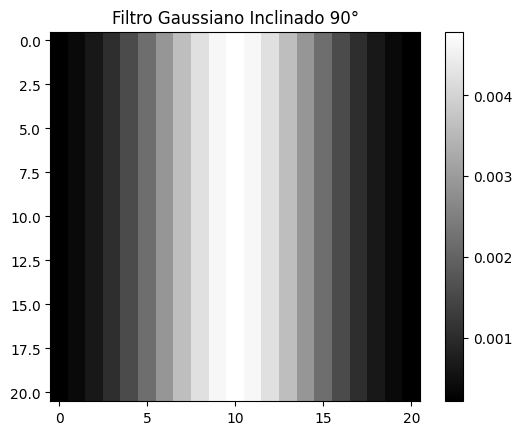

In [5]:
# Th de Sauvola
def ThSauvola(I,w = 12 , k= 0.2, R=128):
    I = I.astype(np.float32)
    
    mu = uniform_filter(I, w, mode='reflect')
    
    mu_sq = uniform_filter(I**2, w, mode='reflect')
    s = np.sqrt(mu_sq - mu**2)

    Th = mu * (1 + k * ((s / R) - 1))
    return (I> Th).astype(np.uint8)*255, Th

# filtro gaureano de perfil (no lo uso pero por si les sirve) se supone que detecta estructuras tubulares
def gausP (K,sig=1,teta=45):
    gau = lambda x: 1/((np.pi*2)**0.5*sig)*np.exp(-x**2/2*sig**2)
    
    grid = np.zeros((2 * K + 1, 2 * K + 1))

    # Convertir el ángulo a radianes
    teta_rad = np.deg2rad(teta)

    # Calcular el filtro inclinado aplicando la rotación
    for i in range(-K, K + 1):
        for j in range(-K, K + 1):
            # Rotar las coordenadas (x', y') = (x * cosθ - y * sinθ, x * sinθ + y * cosθ)
            x_rot = i * np.cos(teta_rad) + j * np.sin(teta_rad)
            grid[i + K, j + K] = gau(x_rot)

    # Normalizar el filtro para que la suma sea 1
    grid /= np.sum(grid)
    

    return grid

# Ejemplo de
filtro = gausP(10, sig=1/4, teta=90)
#Mostrar el filtro
plt.imshow(filtro, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.title(f'Filtro Gaussiano Inclinado {90}°')
plt.show()
    

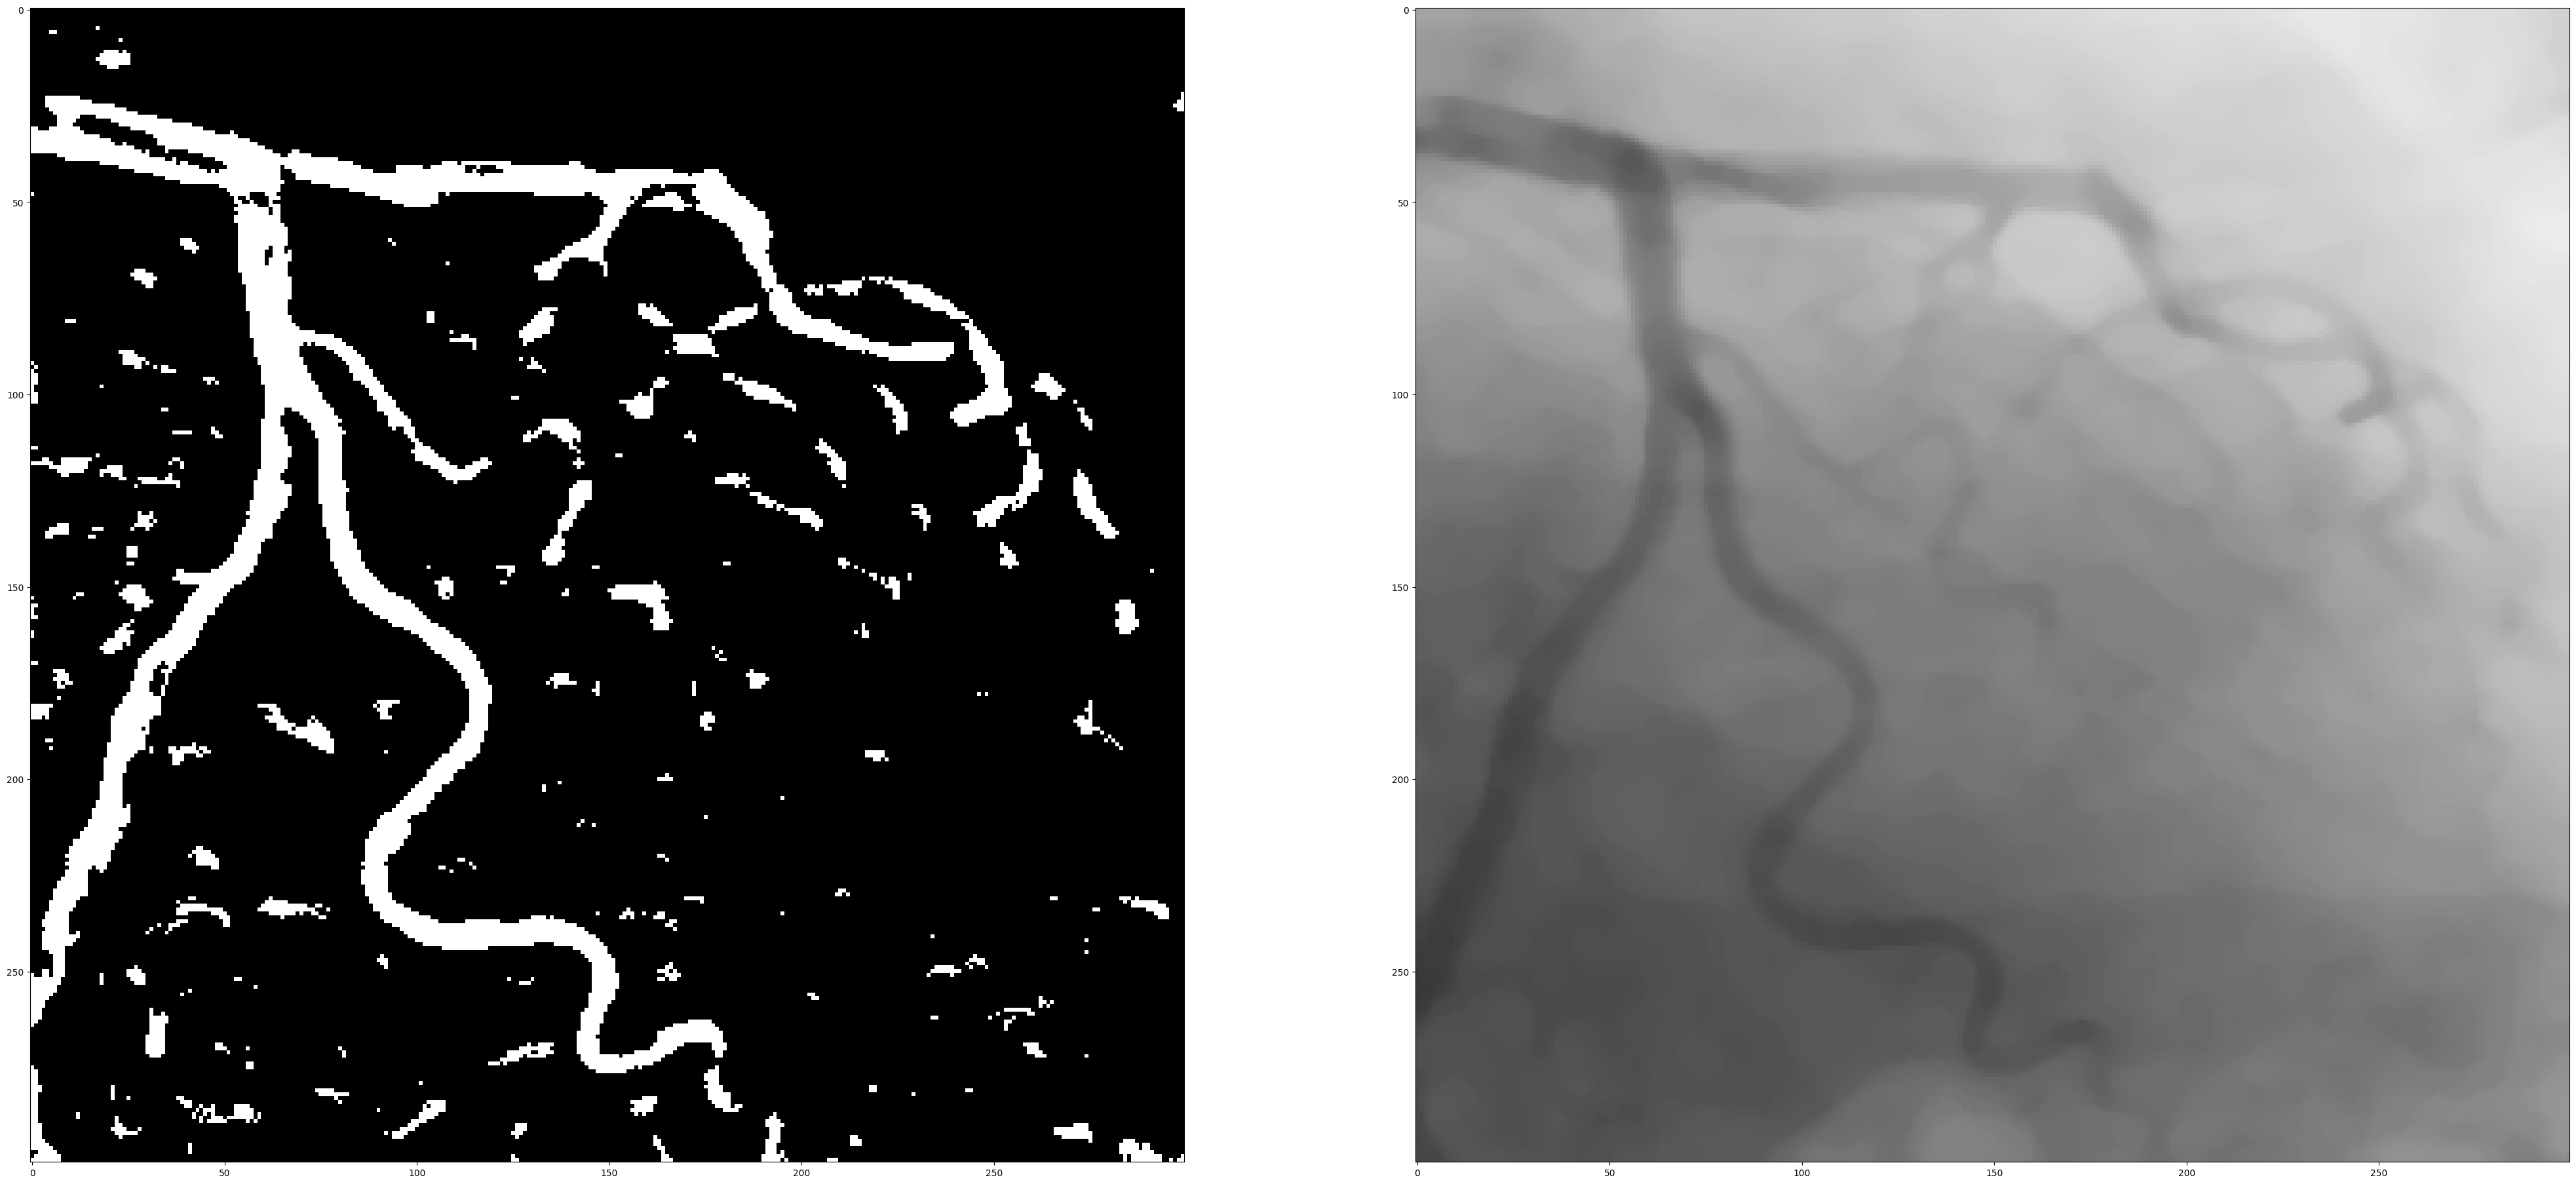

In [6]:
I = plt.imread('database/14.pgm')
S = cv.getStructuringElement(cv.MORPH_ELLIPSE,(15,15)) #44 #44
S2 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
#T = cv.morphologyEx(I,cv.MORPH_BLACKHAT,S) #HACE EL TRABAJO PERO CON MUCHO RUIDO
d = 5
f = np.array(([0,  -1 ,  0],  
            [-1  , 5 , -1 ] ,
            [0,  -1 ,  0]),dtype="int" ) 


#I = cv.filter2D(I,-1,f)

#I = cv.morphologyEx(I, cv.MORPH_CLOSE, S2)
I = cv.medianBlur(I, 7)
#I = cv.dilate(I, S2, iterations=3)
#I = cv.filter2D(I,-1,f)
#I = cv.(I, S2, iterations=3)

#I = cv.dilate(I, S2, iterations=1)
#I = cv.GaussianBlur(I,(21,21),0)
#I = cv.filter2D(I,-1,f)
I = cv.morphologyEx(I,cv.MORPH_OPEN,S2) #HACE EL TRABAJO mejor despues de un afilado

#T = cv.filter2D(T,-1,f)
#T, t  = ThLocal(I, 50,50)
#T ,i ,ii = ThRC(I)

T, th = ThSauvola(I,k=0.022, R = 128)#ski.exposure.equalize_hist(I, nbins=256, mask=None) k = 0.03
T = cv.morphologyEx(T,cv.MORPH_BLACKHAT,S) #HACE EL TRABAJO PERO CON MUCHO RUIDO
#T = cv.medianBlur(T, 3)



plt.figure(figsize=(50,50))
plt.subplot(1,2,1) 
plt.imshow(T,cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)                                 
plt.imshow(I,cmap='gray', vmin=0, vmax=255)
plt.show()

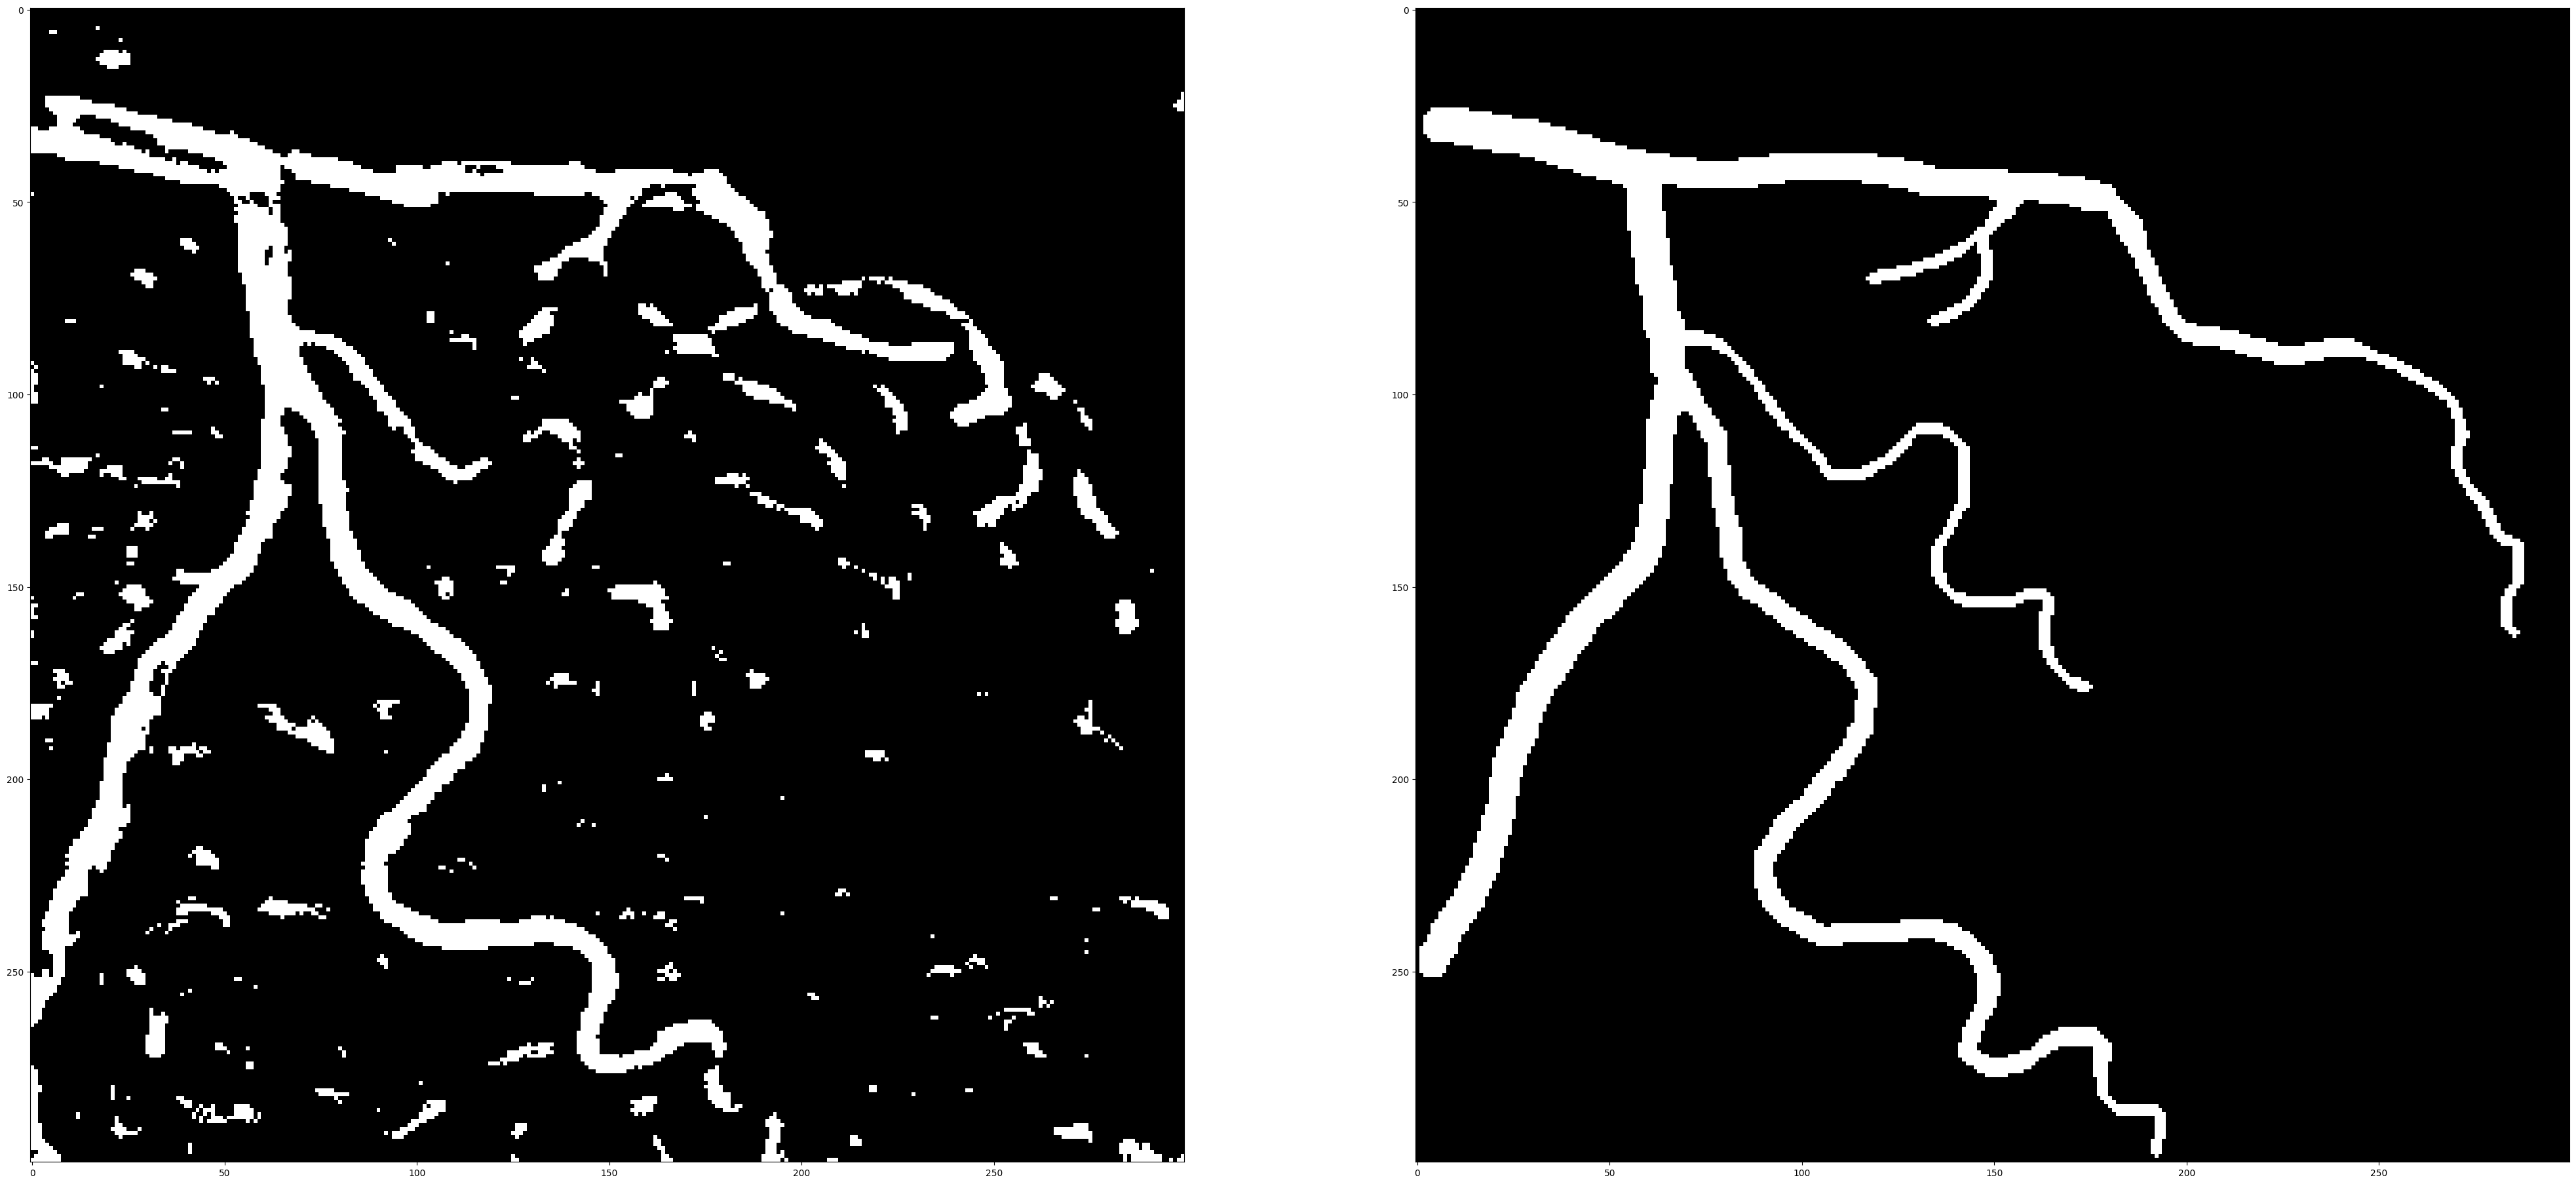

In [7]:
I_2 = plt.imread('database/14_gt.pgm')
plt.figure(figsize=(50,50))
plt.subplot(1,2,1) 
plt.imshow(T,cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)                                 
plt.imshow(I_2,cmap='gray', vmin=0, vmax=255)
plt.show()

In [8]:
from skimage.filters.thresholding import threshold_otsu
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
from skimage.measure import label, regionprops
from PIL import Image
import cv2 as cv

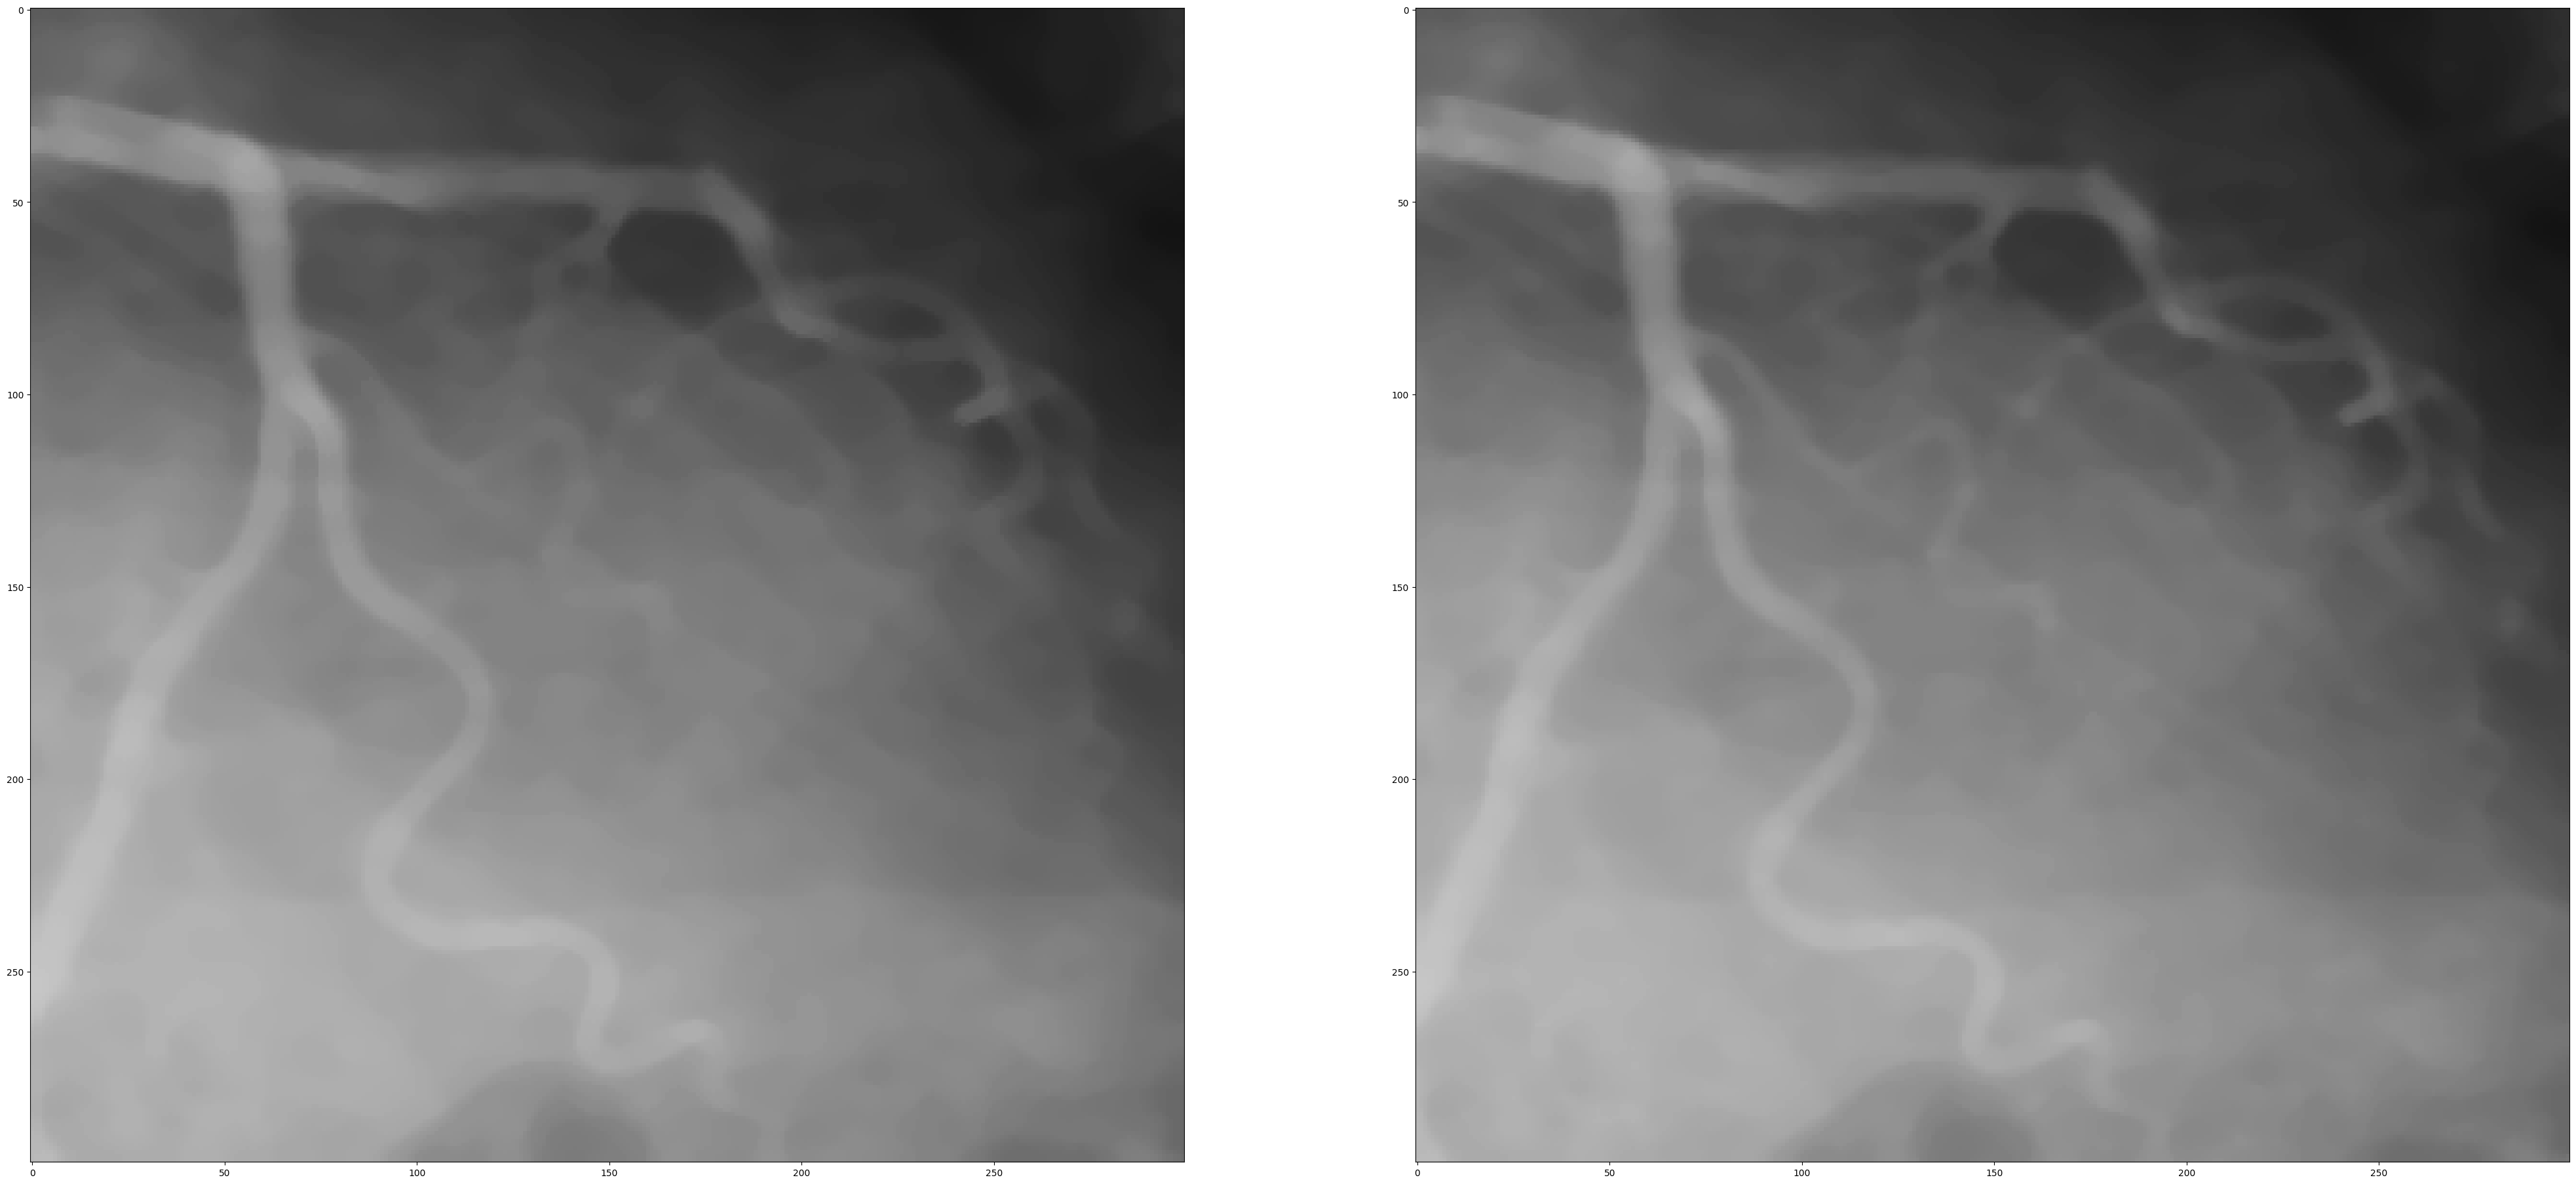

In [9]:
S2 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
I2 = 255 - I
for x in range(0, 4):
    I2 = cv.erode(I2, S2, iterations=1)
    I2 = cv.dilate(I2, S2, iterations=1)

plt.figure(figsize=(50,50))
plt.subplot(1,2,1) 
plt.imshow(I2,cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)                                 
plt.imshow(255-I,cmap='gray', vmin=0, vmax=255)
plt.show()

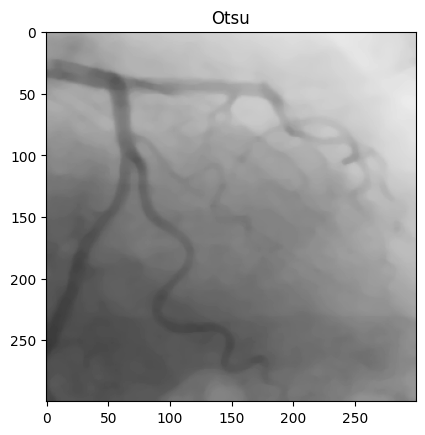

In [10]:
kernel = np.ones((1,1), np.uint8)  # You can adjust the size of the kernel
Ith2 = cv.morphologyEx(I, cv.MORPH_CLOSE, kernel)
plt.title("Otsu")
plt.imshow(Ith2, cmap='gray', vmin=0, vmax=255)
plt.show()

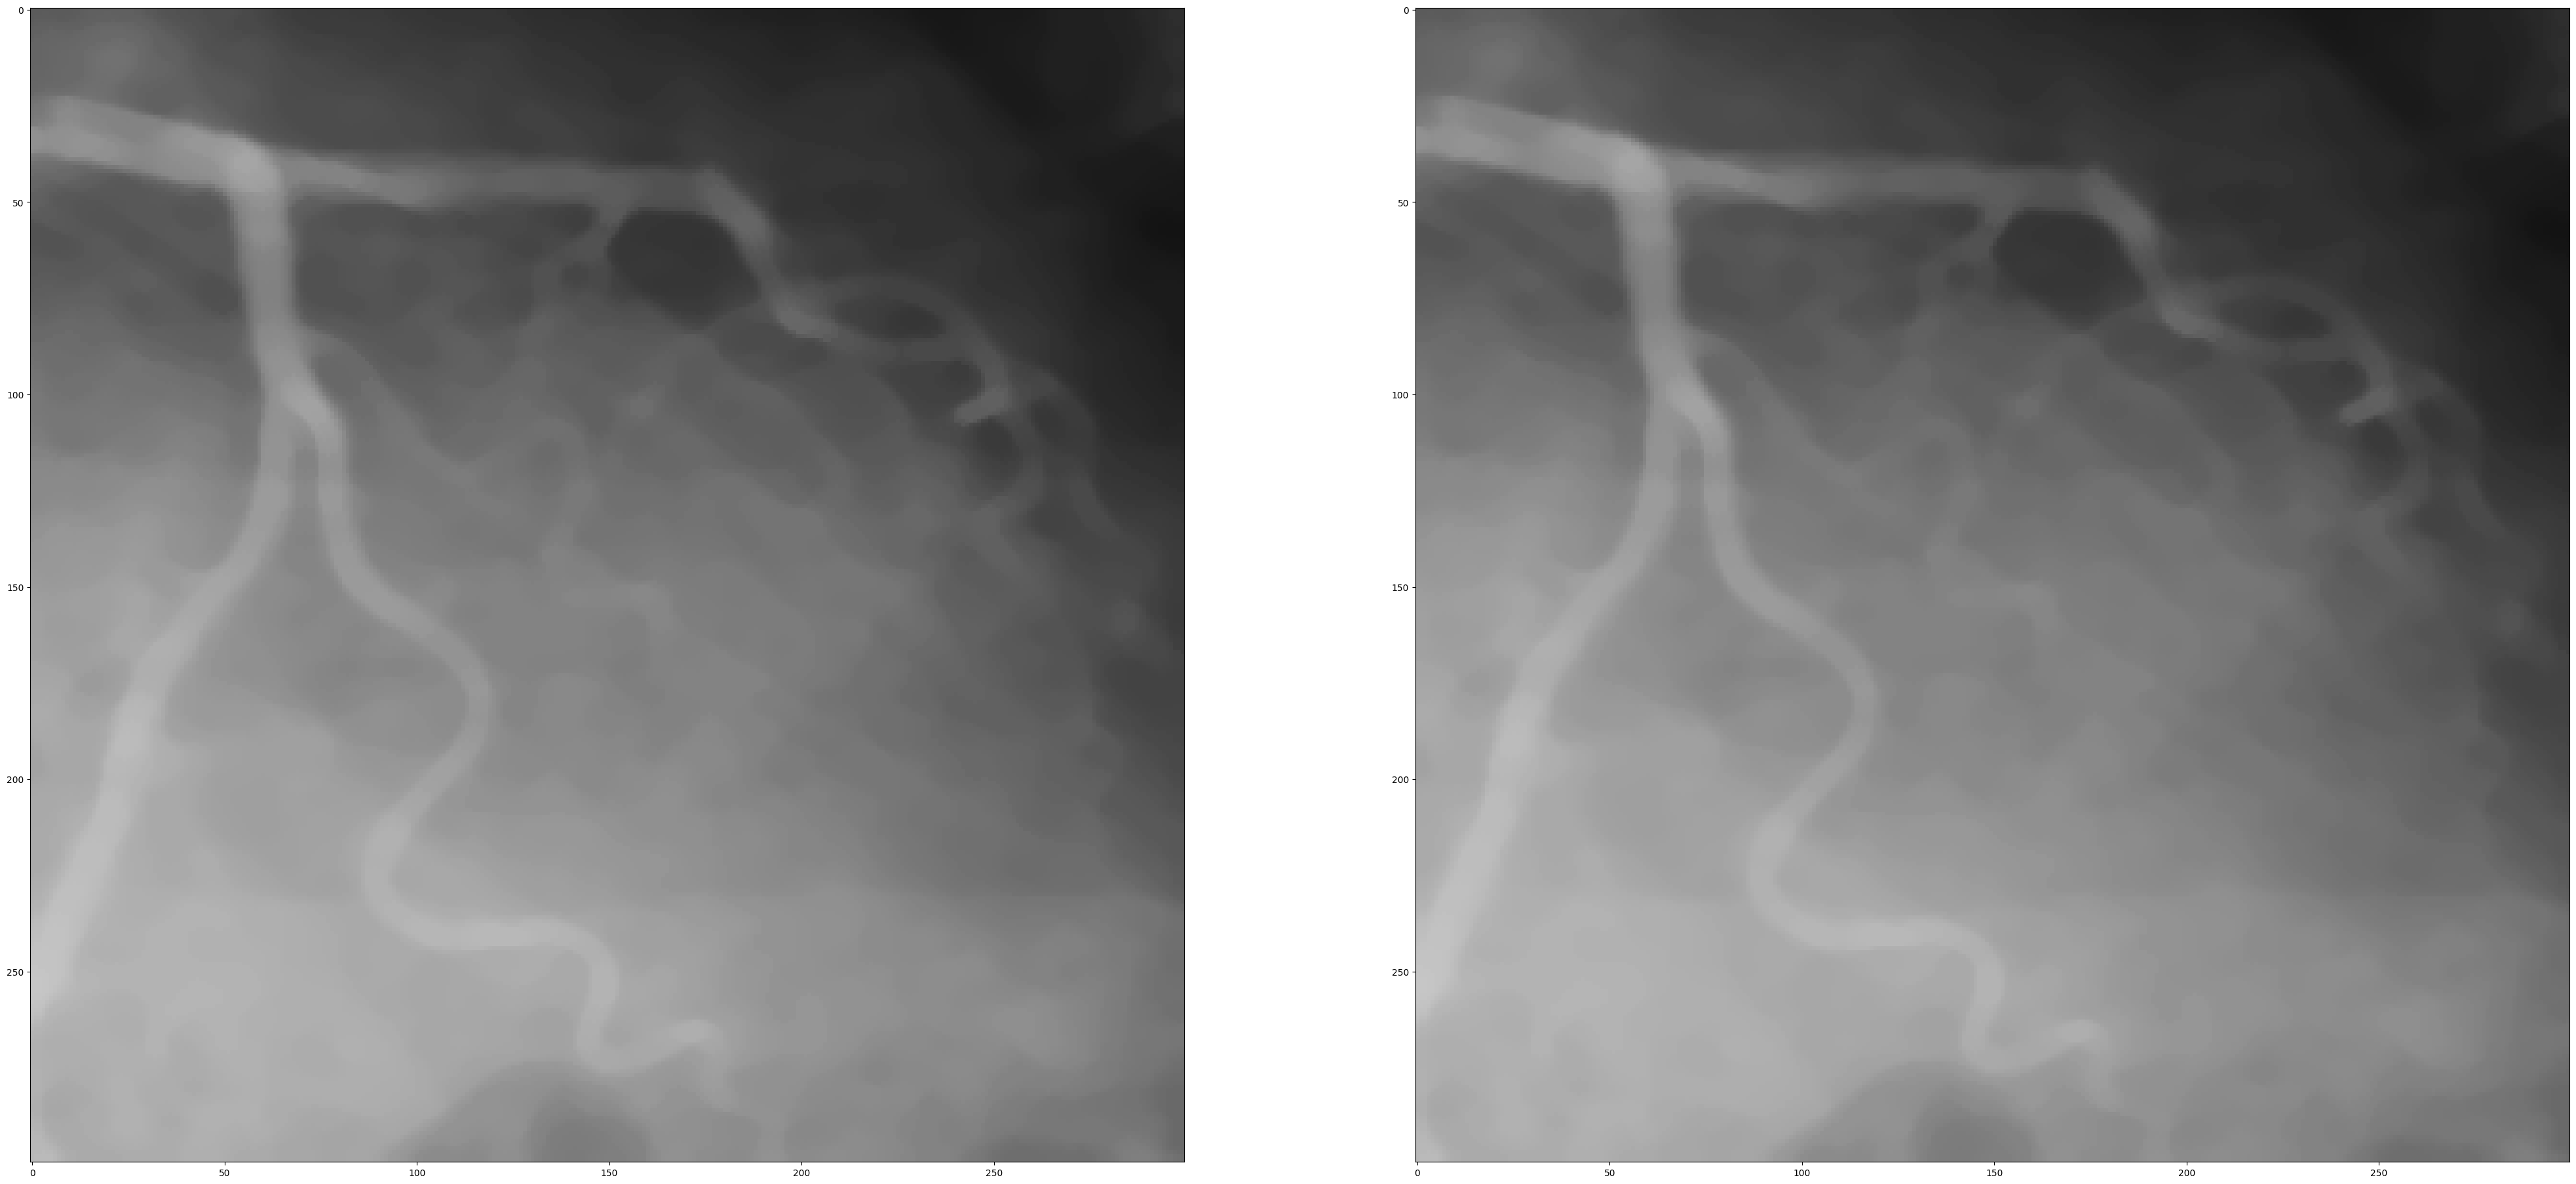

In [11]:
from skimage.filters import threshold_otsu, threshold_niblack
thresh2 = threshold_niblack(I2, window_size=1, k=2)
kernel = np.ones((1,1), np.uint8)  # You can adjust the size of the kernel
Ith2 = cv.morphologyEx(thresh2, cv.MORPH_CLOSE, kernel)
plt.figure(figsize=(50,50))
plt.subplot(1,2,1) 
plt.imshow(thresh2,cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)                                 
plt.imshow(Ith2,cmap='gray', vmin=0, vmax=255)
plt.show()

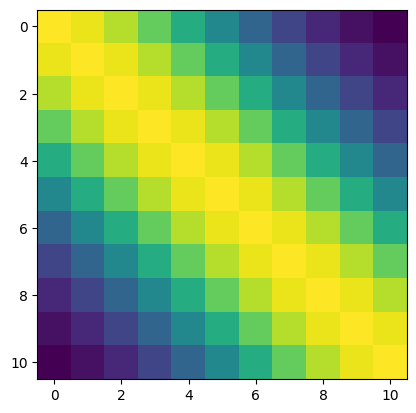

In [12]:
filtro = gausP(5, sig=1/3, teta=-45)
plt.imshow(filtro)

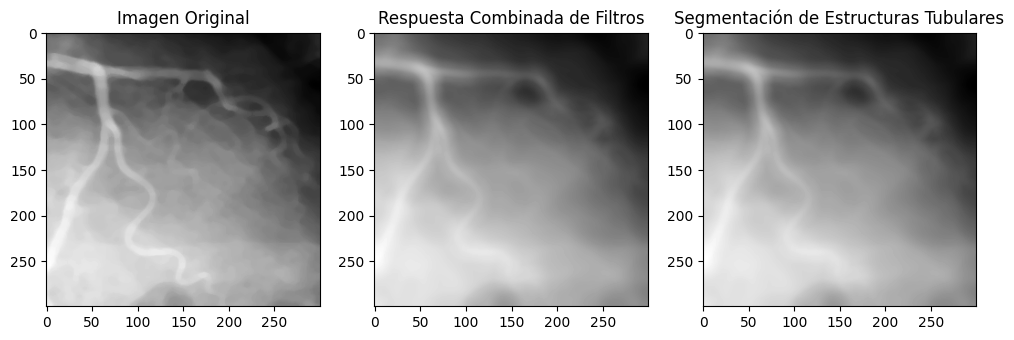

In [13]:
# Inicializar imagen de respuesta combinada
I_combined = np.zeros_like(I2, dtype=np.float32)

# Aplicar filtros en el rango [0, π] con pasos de 15°
angles = np.arange(0, 181, 15)  # De 0° a 180° (equivalente a 0 a π en radianes)
for teta in angles:
    filtro = gausP(10, sig=1/4, teta=teta)
    I_filtered = cv.filter2D(I2, -1, filtro)
    I_combined = np.maximum(I_combined, I_filtered)  # Tomar el máximo entre todas las respuestas

# Normalizar la imagen combinada al rango [0, 255]
I_combined = cv.normalize(I_combined, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

thresh1 = threshold_niblack(I_combined, window_size=1, k=2)

# Mostrar resultados
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.title("Imagen Original")
plt.imshow(I2, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Respuesta Combinada de Filtros")
plt.imshow(I_combined, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Segmentación de Estructuras Tubulares")
plt.imshow(thresh1, cmap='gray')
plt.show()


In [14]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter

def ThSauvola(I,w = 12 , k= 0.2, R=128):
    I = I.astype(np.float32)
    
    mu = uniform_filter(I, w, mode='reflect')
    
    mu_sq = uniform_filter(I**2, w, mode='reflect')
    s = np.sqrt(mu_sq - mu**2)

    Th = mu * (1 + k * ((s / R) - 1))
    return (I > Th).astype(np.uint8)*255, Th

def ThNiblack(I, w=15, k=-0.2):
    """ Niblack's thresholding. """
    I = I.astype(np.float32)
    mu = uniform_filter(I, w, mode='reflect')
    mu_sq = uniform_filter(I**2, w, mode='reflect')
    sigma = np.sqrt(mu_sq - mu**2)
    Th = mu + k * sigma
    return (I > T).astype(np.uint8) * 255, Th

def ThWolfJolion(I, w=15, k=0.5, R=128):
    """ Wolf-Jolion thresholding. """
    I = I.astype(np.float32)
    mu = uniform_filter(I, w, mode='reflect')
    mu_sq = uniform_filter(I**2, w, mode='reflect')
    sigma = np.sqrt(mu_sq - mu**2)
    min_I = np.min(I)
    Th = (1 - k) * mu + k * ((mu - min_I) / (R - min_I)) * sigma
    return (I > Th).astype(np.uint8) * 255, Th

def ThBernsen(I, w=15, Cmin=15):
    """ Bernsen's thresholding. """
    half_w = w // 2
    T = np.zeros_like(I, dtype=np.float32)
    for i in range(half_w, I.shape[0] - half_w):
        for j in range(half_w, I.shape[1] - half_w):
            local_region = I[i - half_w:i + half_w + 1, j - half_w:j + half_w + 1]
            Imax, Imin = np.max(local_region), np.min(local_region)
            if (Imax - Imin) < Cmin:
                T[i, j] = 128  # Default global threshold
            else:
                T[i, j] = (Imax + Imin) / 2
    return (I > T).astype(np.uint8) * 255, 0

def ThPhansalkar(I, w=15, k=0.25, R=128, p=2, q=10):
    """ Phansalkar's thresholding. """
    I = I.astype(np.float32)
    mu = uniform_filter(I, w, mode='reflect')
    mu_sq = uniform_filter(I**2, w, mode='reflect')
    sigma = np.sqrt(mu_sq - mu**2)
    Th = mu * (1 + p * np.exp(-q * mu) + k * ((sigma / R) - 1))
    return (I > Th).astype(np.uint8) * 255, Th

def ThAdaptiveMean(I, w=15):
    """ Adaptive mean thresholding. """
    I = I.astype(np.float32)
    Th = uniform_filter(I, w, mode='reflect')
    return (I > Th).astype(np.uint8) * 255, Th


def ThContrastAdaptive(I, w=15, Cmin=15, erosion_iter=1):
    """ Contrast-based adaptive thresholding with erosion. """
    half_w = w // 2
    T = np.zeros_like(I, dtype=np.float32)
    for i in range(half_w, I.shape[0] - half_w):
        for j in range(half_w, I.shape[1] - half_w):
            local_region = I[i - half_w:i + half_w + 1, j - half_w:j + half_w + 1]
            Imax = np.max(local_region)
            T[i, j] = Imax - Cmin
    return (I > T).astype(np.uint8) * 255, 0

def ThGaussianWeighted(I, w=15, sigma=5):
    """ Gaussian weighted local thresholding. """
    I = I.astype(np.float32)
    Th = cv.GaussianBlur(I, (w, w), sigma)
    return (I > Th).astype(np.uint8) * 255, Th

def display_results(I, methods, fileName):
    """ Display original and thresholded images. """
    results = {}
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, 1)
    try:
        plt.title(f"Manual Filtered Image")
        filtered = plt.imread(f'{os.curdir}/database/{fileName.split(".")[0]+"_gt."+fileName.split(".")[1]}')
        plt.imshow(filtered, cmap='gray')
        results['manual_filtered_image'] = filtered
    except:
        plt.title(f"Original Image")
        plt.imshow(I, cmap='gray')
        results['manual_filtered_image'] = I

    for i, (name, method) in enumerate(methods.items()):
        plt.subplot(3, 3, i + 2)
        plt.title(name)
        I2, th = method(I)
        results[method.__name__] =I2
        plt.imshow(255-I2, cmap='gray')
    
    plt.tight_layout()
    plt.show()
    return results

/tmp/ipykernel_9761/1387404524.py:47: RuntimeWarning: overflow encountered in scalar add
  T[i, j] = (Imax + Imin) / 2


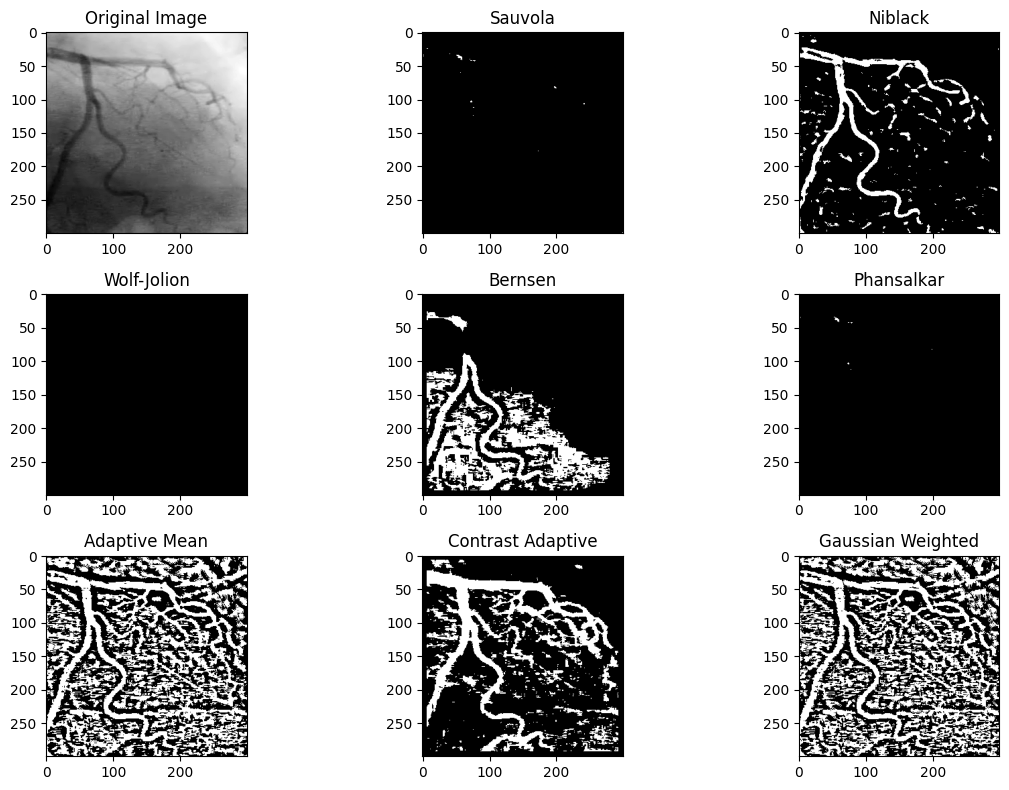

{'manual_filtered_image': array([[167, 167, 166, ..., 208, 208, 209],
        [166, 165, 165, ..., 208, 208, 209],
        [164, 163, 163, ..., 209, 209, 209],
        ...,
        [ 73,  71,  69, ..., 152, 157, 150],
        [ 73,  72,  69, ..., 148, 147, 125],
        [ 75,  72,  69, ..., 139, 125,  81]], dtype=uint8),
 'ThSauvola': array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255,   0]], dtype=uint8),
 'ThNiblack': array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255,   0, ..., 255, 255, 255],
        [255,   0,   0, ..., 255, 255,   0],
        [  0,   0,   0, ..., 255,   0,   0]], dtype=uint8),
 'ThWolfJolion': array([[255, 255, 255, ..., 255, 255, 

In [15]:
# Define thresholding methods
methods = {
    "Sauvola": ThSauvola,
    "Niblack": ThNiblack,
    "Wolf-Jolion": ThWolfJolion,
    "Bernsen": ThBernsen,
    "Phansalkar": ThPhansalkar,
    "Adaptive Mean": ThAdaptiveMean,
    "Contrast Adaptive": ThContrastAdaptive,
    "Gaussian Weighted": ThGaussianWeighted,
}
I = plt.imread('database/14.pgm')
# Display results
display_results(I, methods, 'database/14.pgm')

/tmp/ipykernel_9761/1387404524.py:47: RuntimeWarning: overflow encountered in scalar add
  T[i, j] = (Imax + Imin) / 2


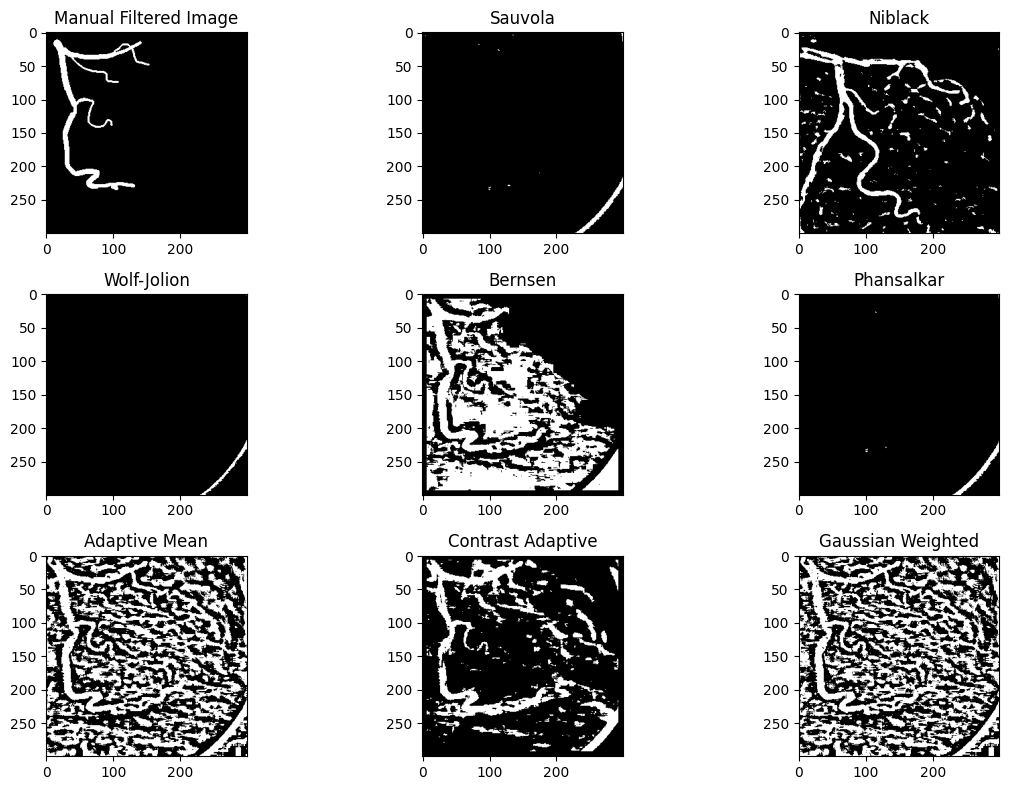

/tmp/ipykernel_9761/1387404524.py:74: RuntimeWarning: overflow encountered in scalar subtract
  T[i, j] = Imax - Cmin


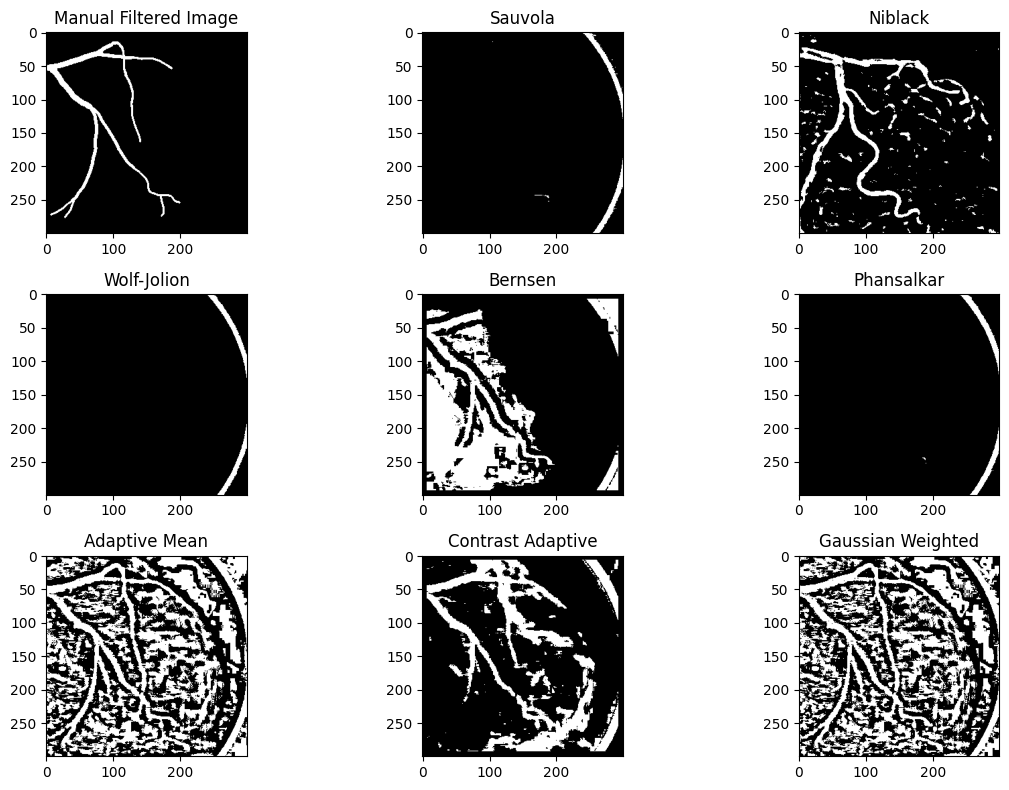

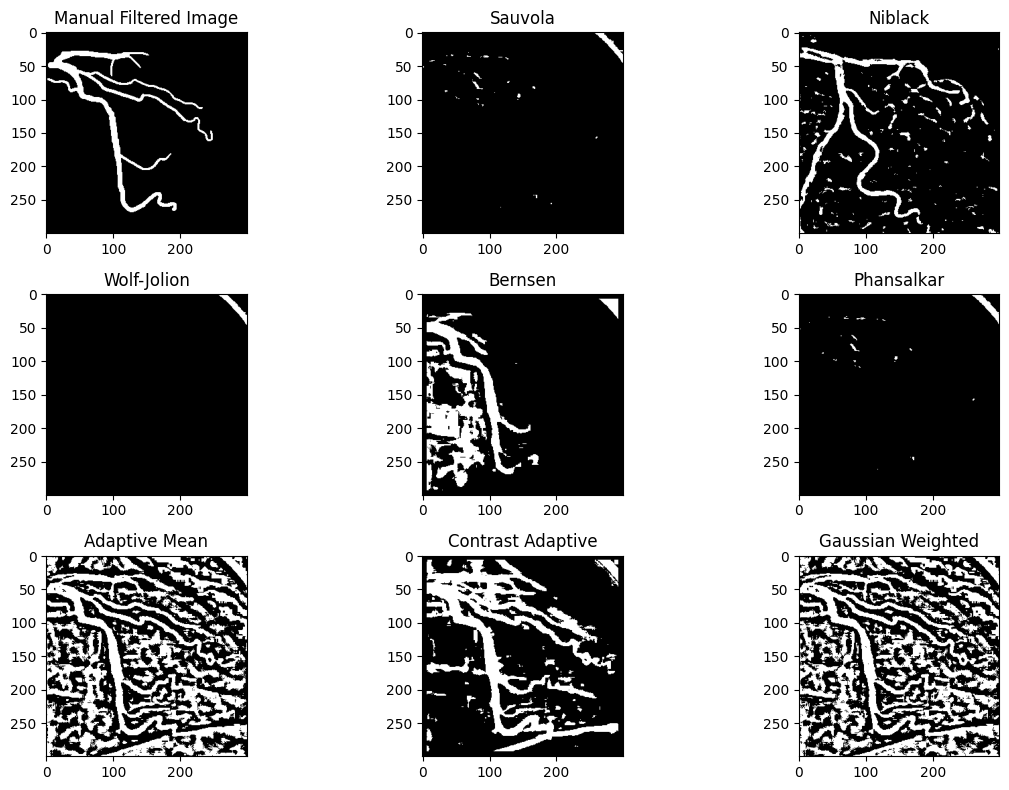

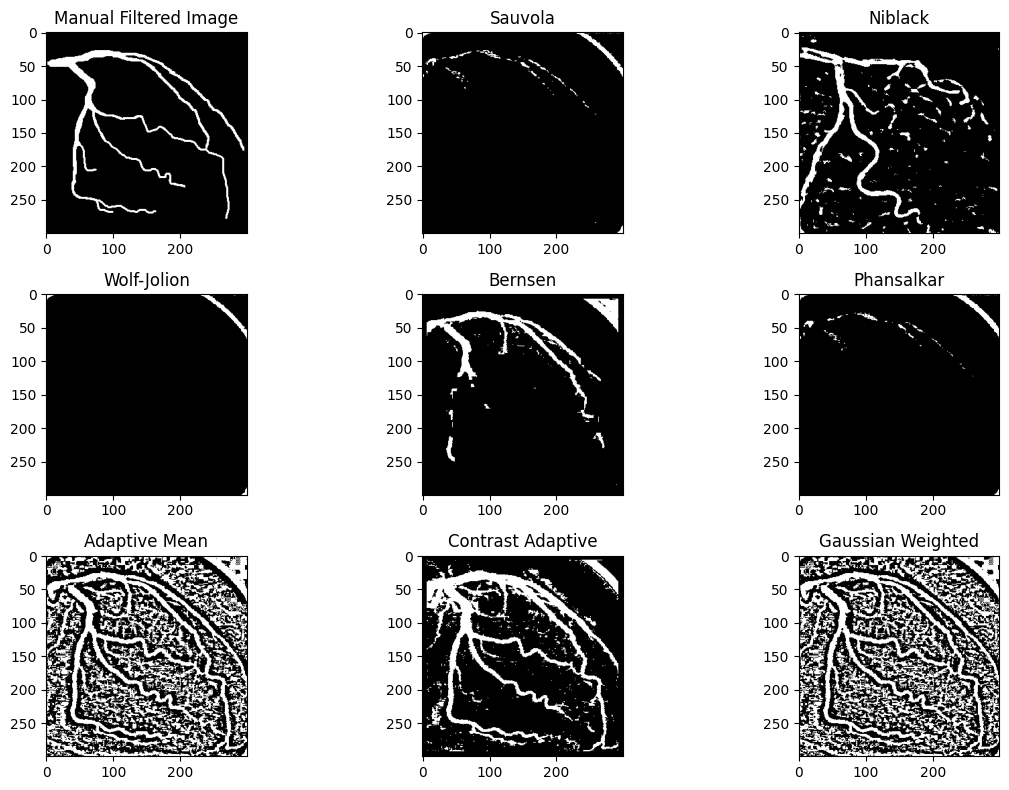

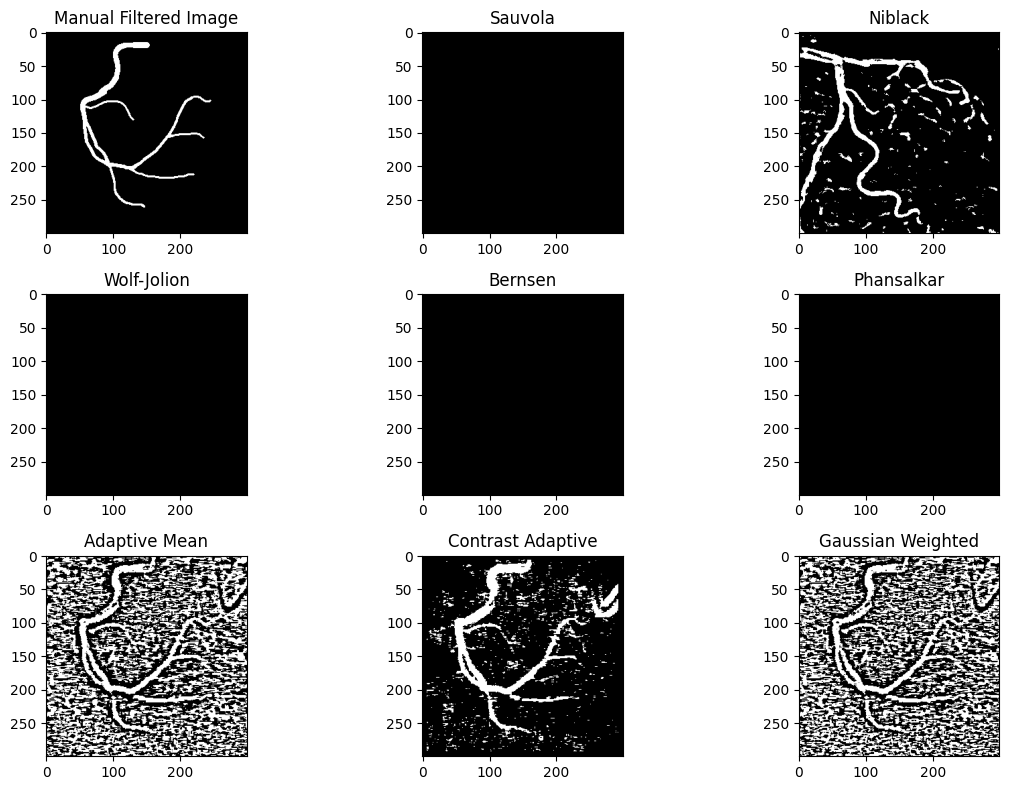

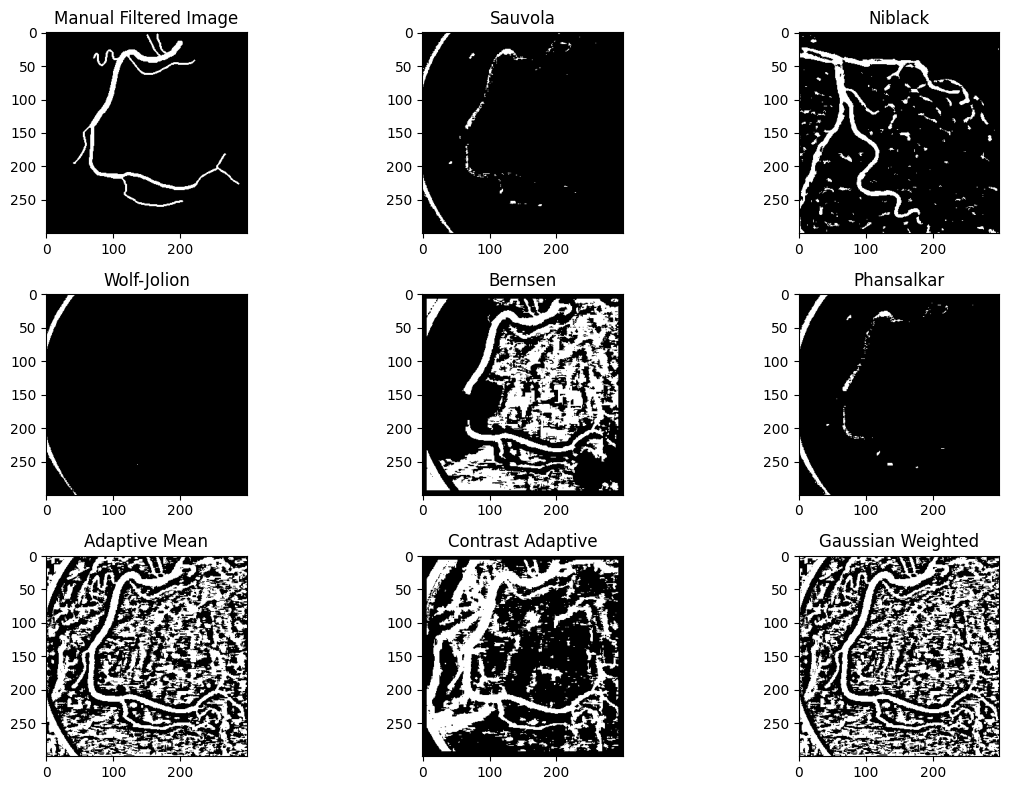

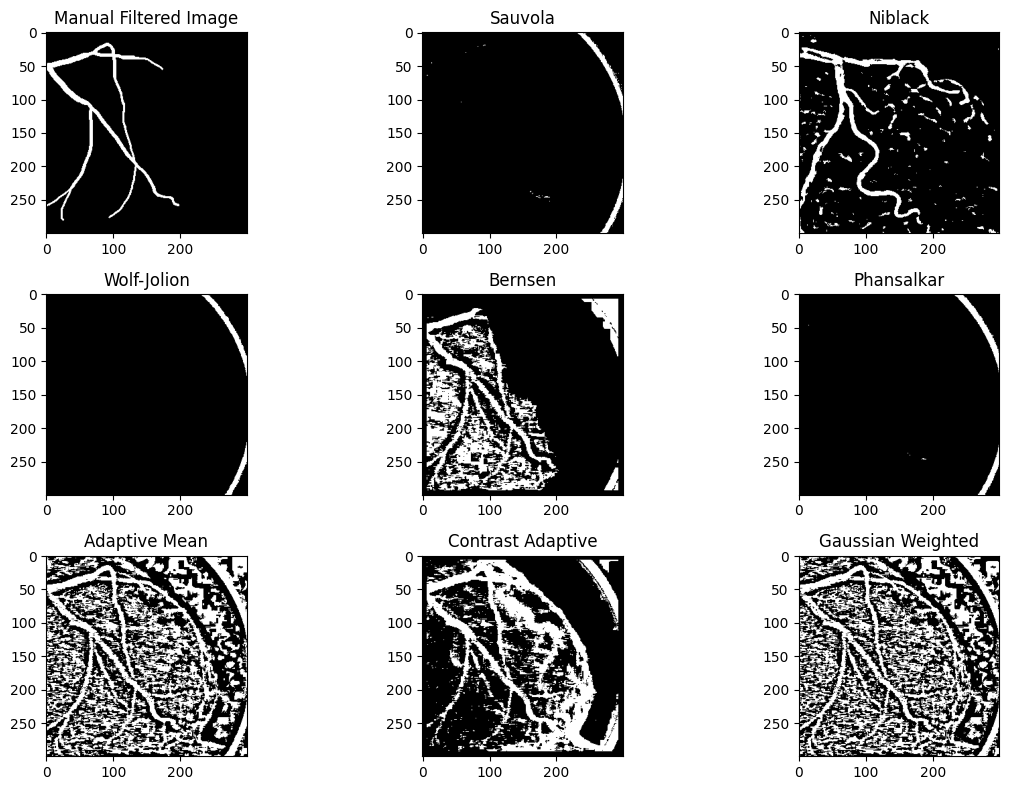

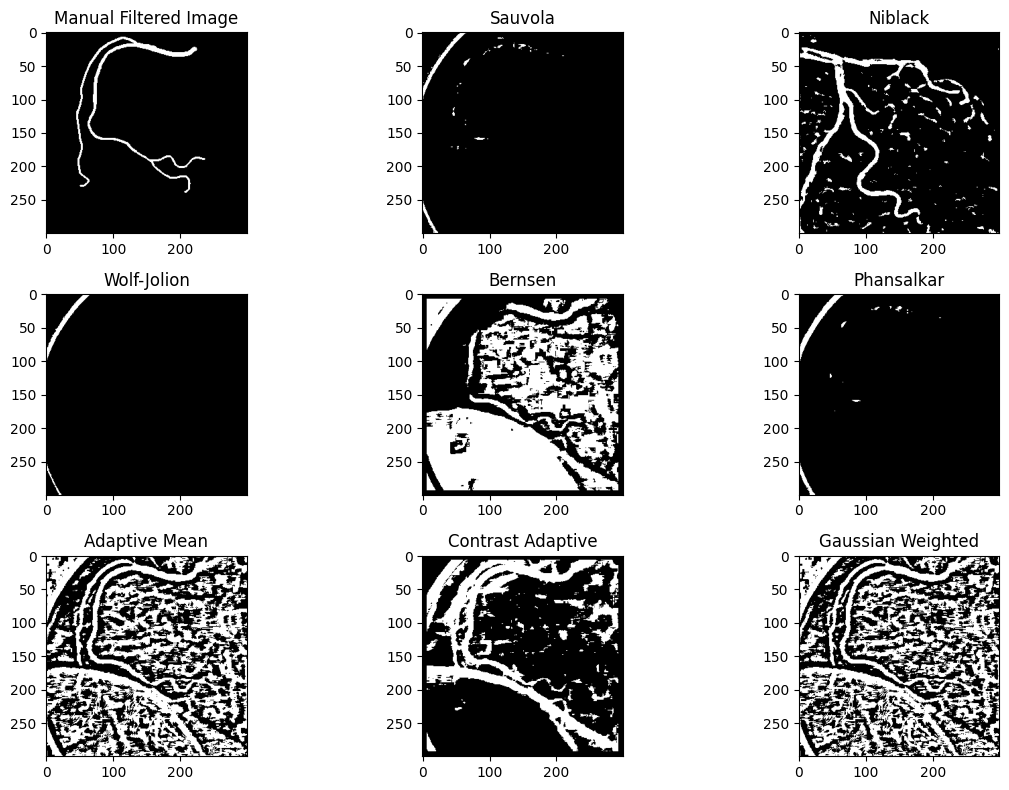

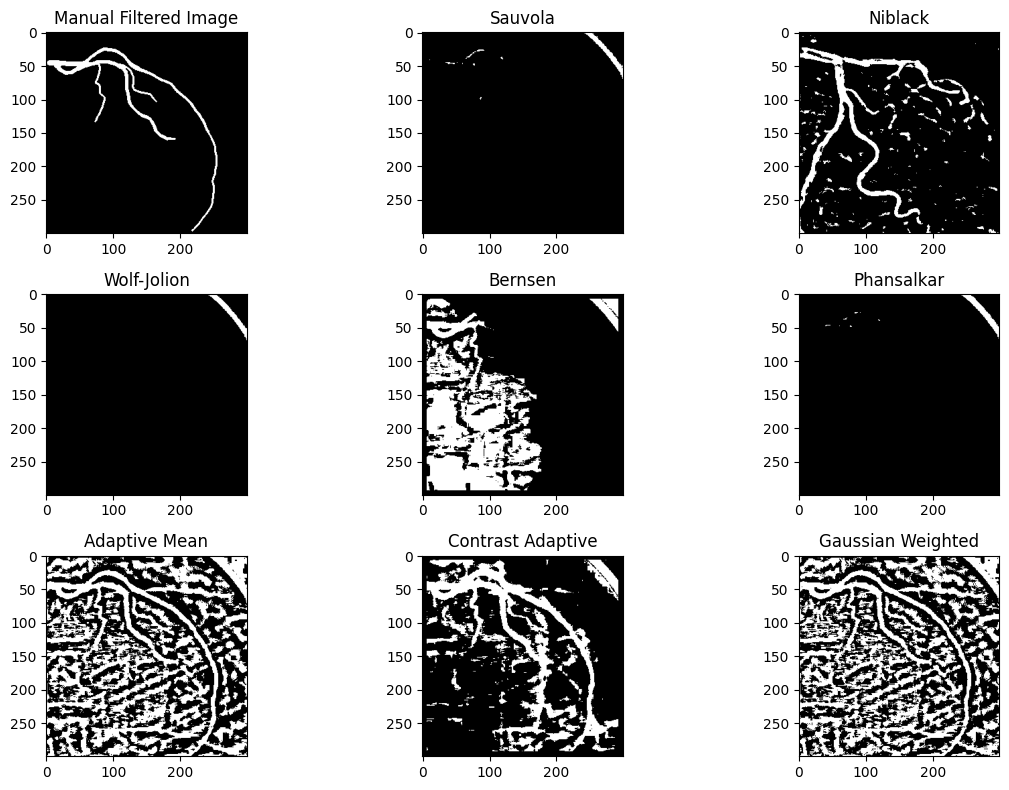

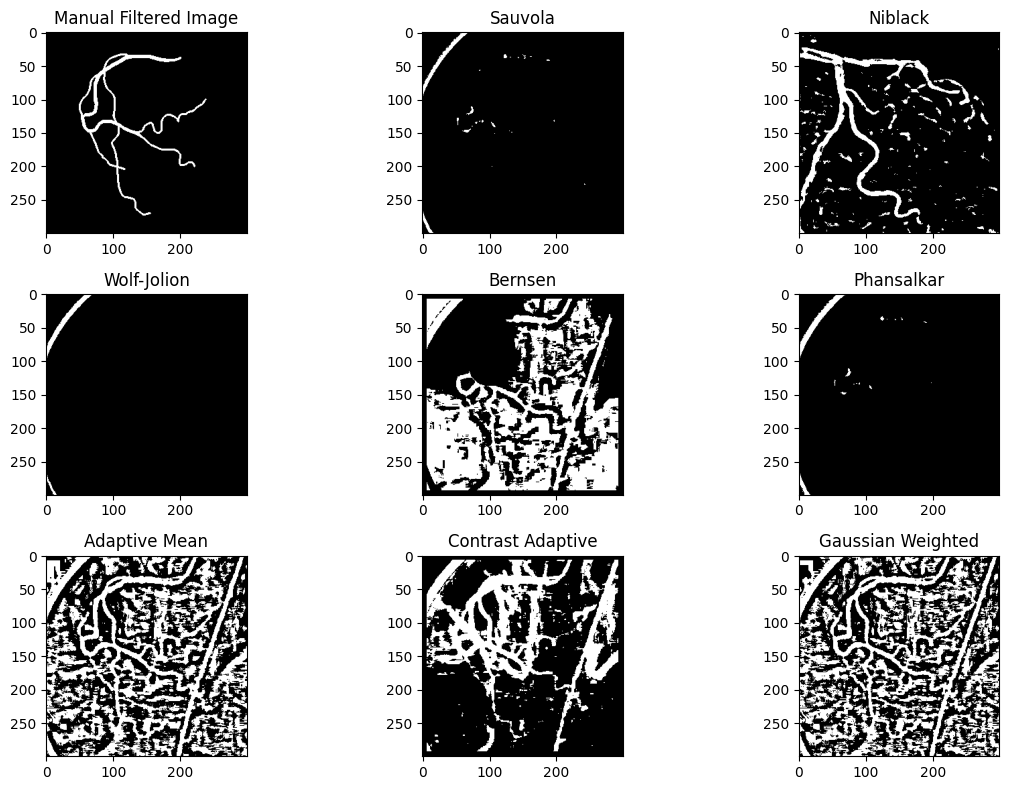

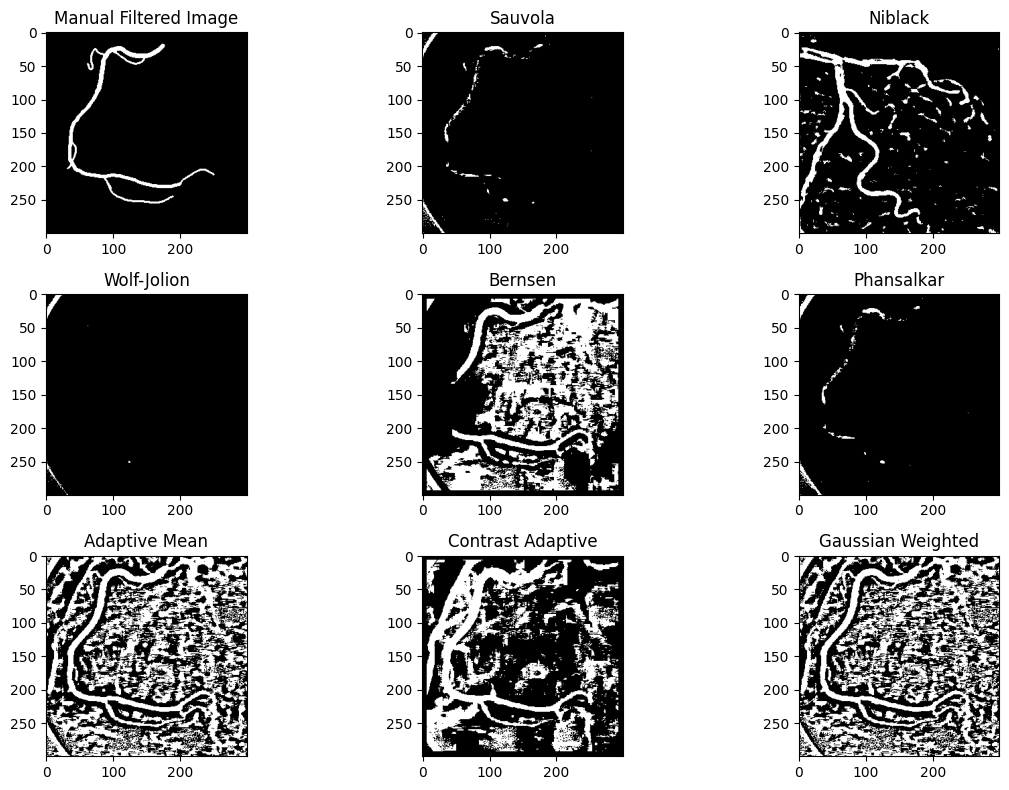

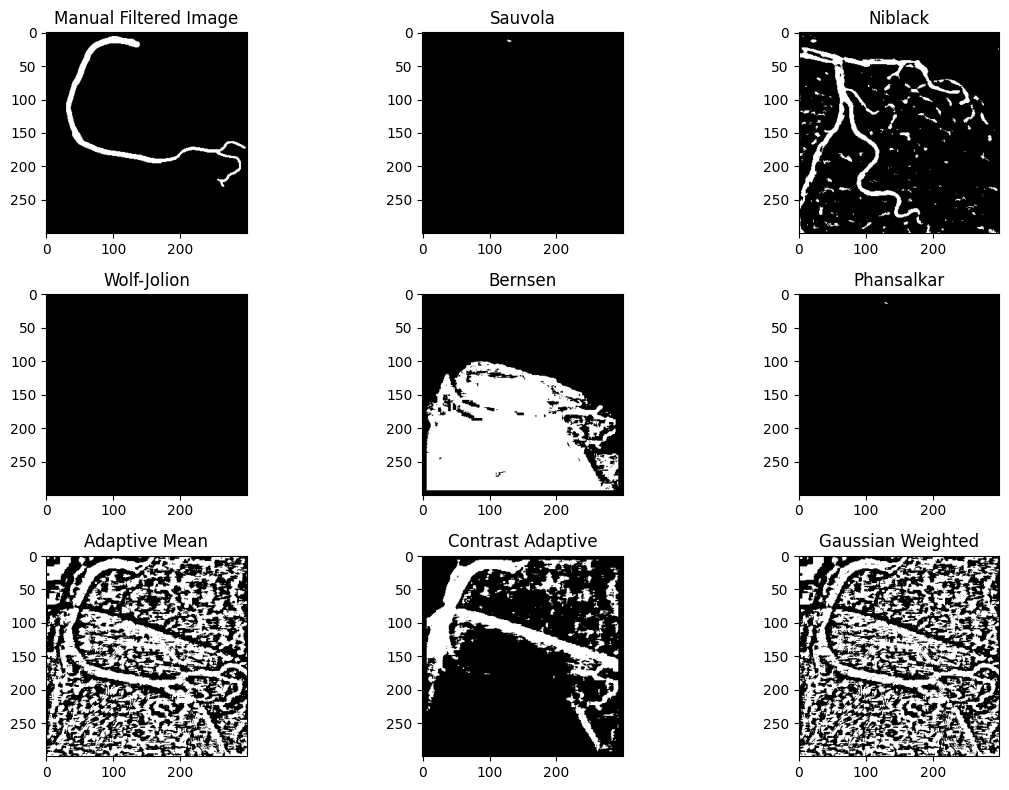

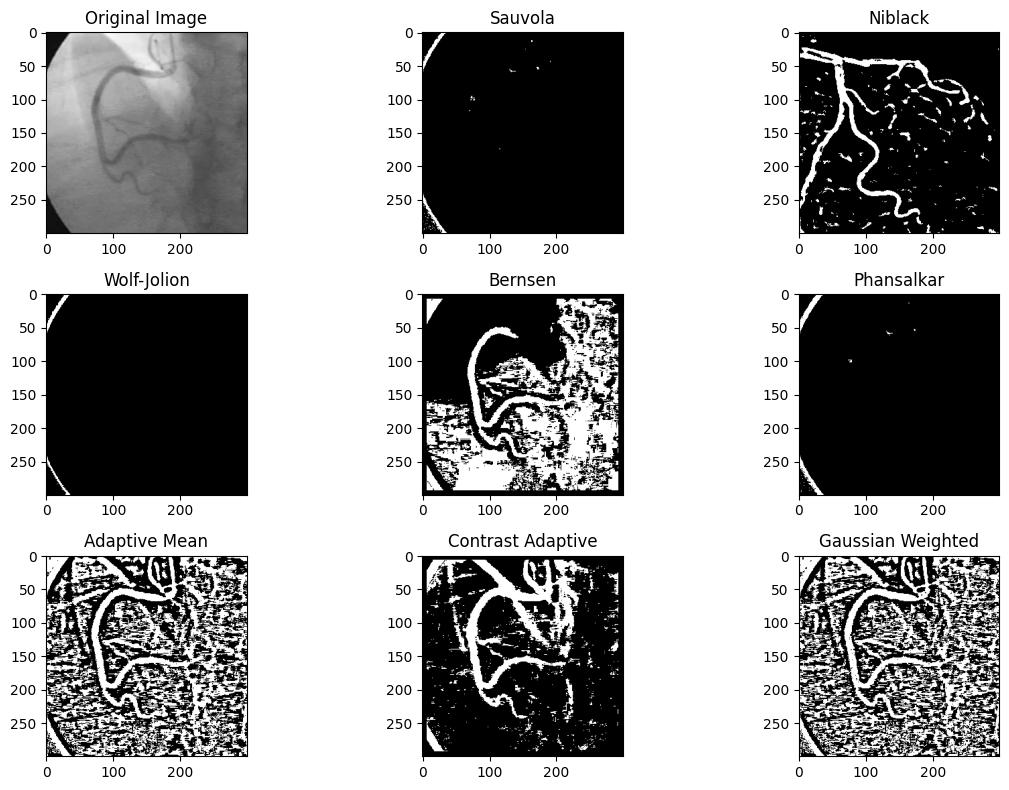

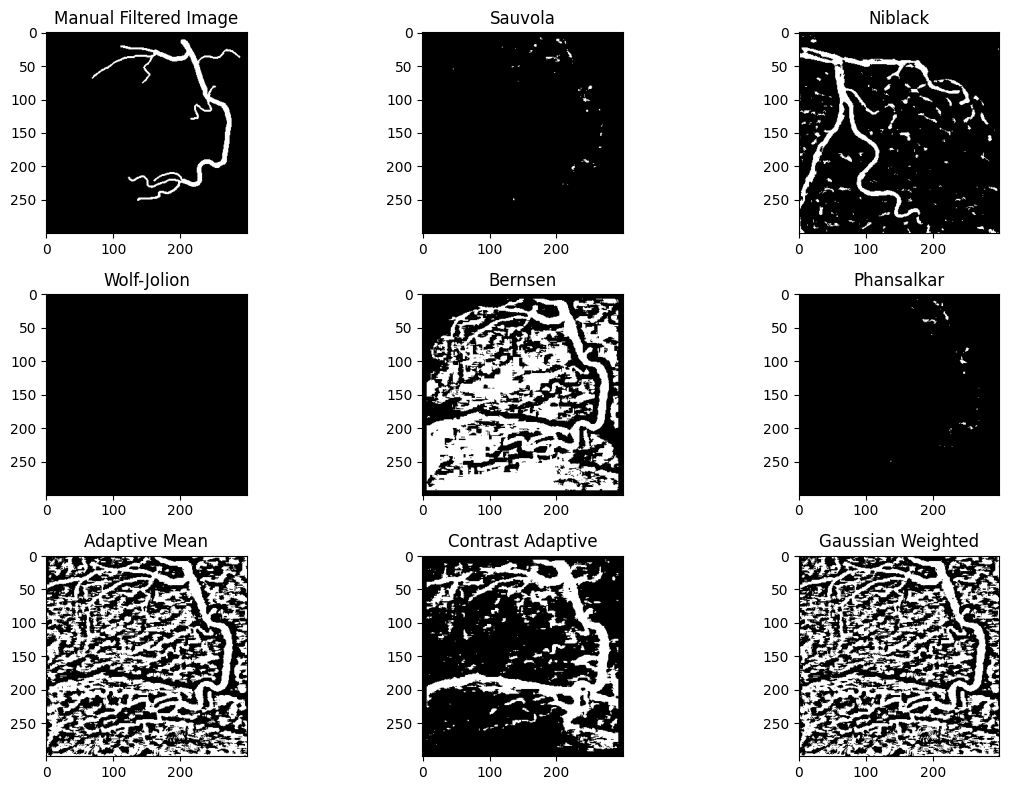

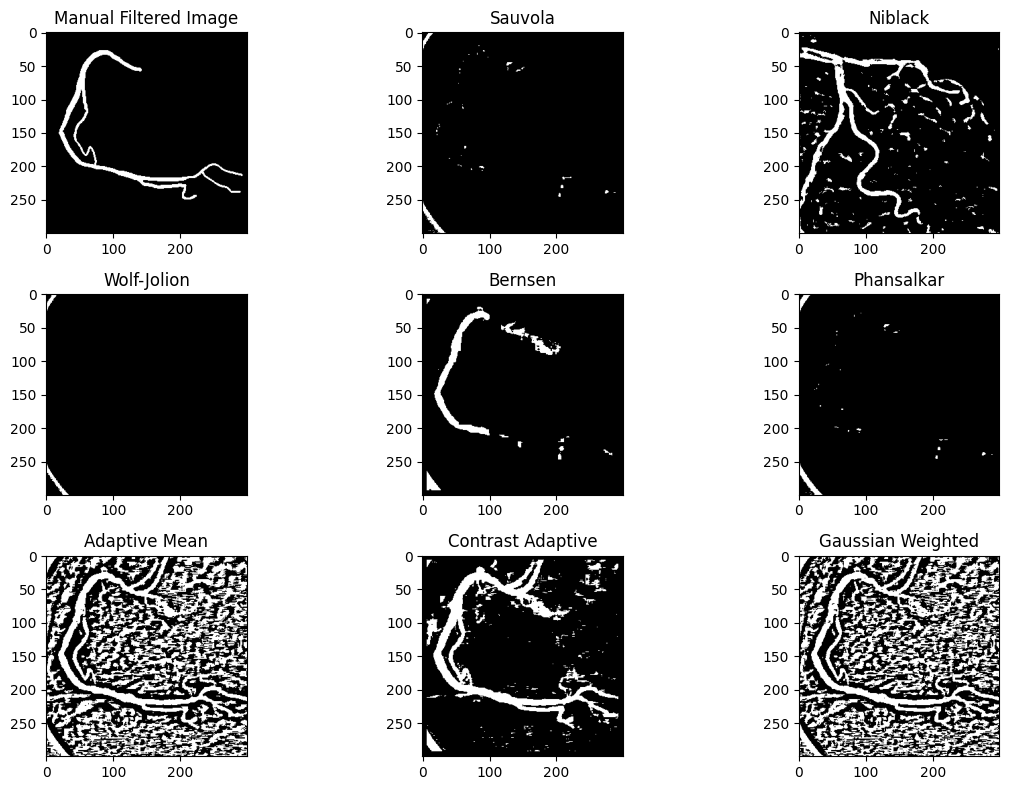

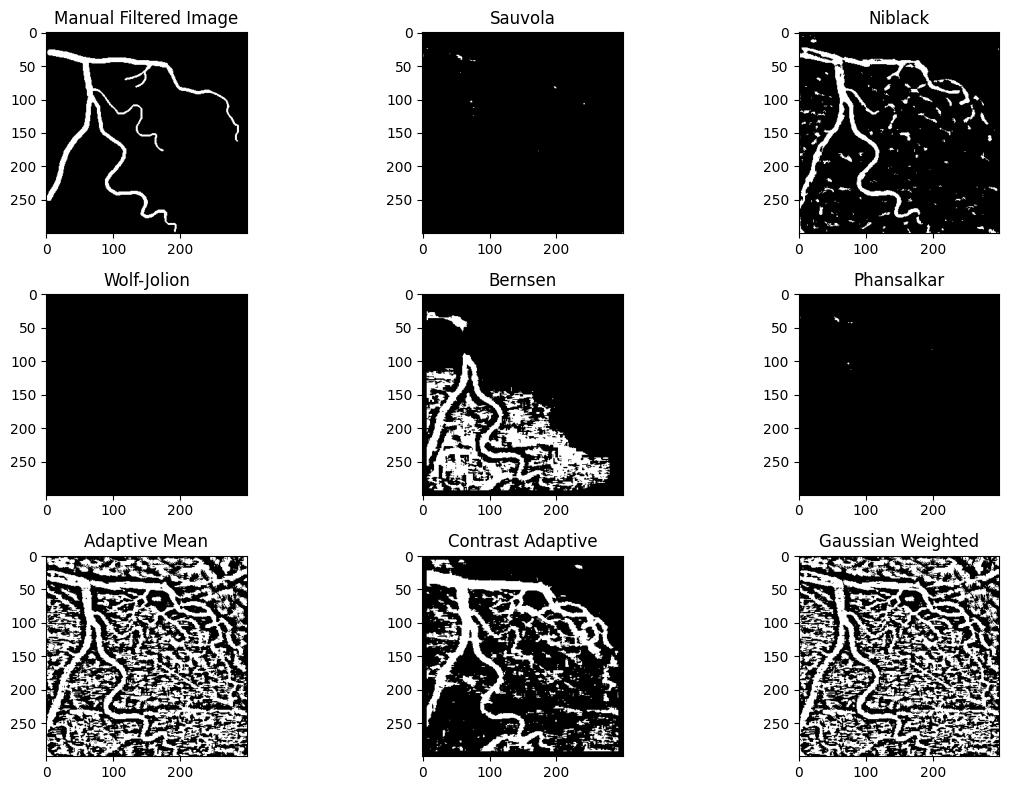

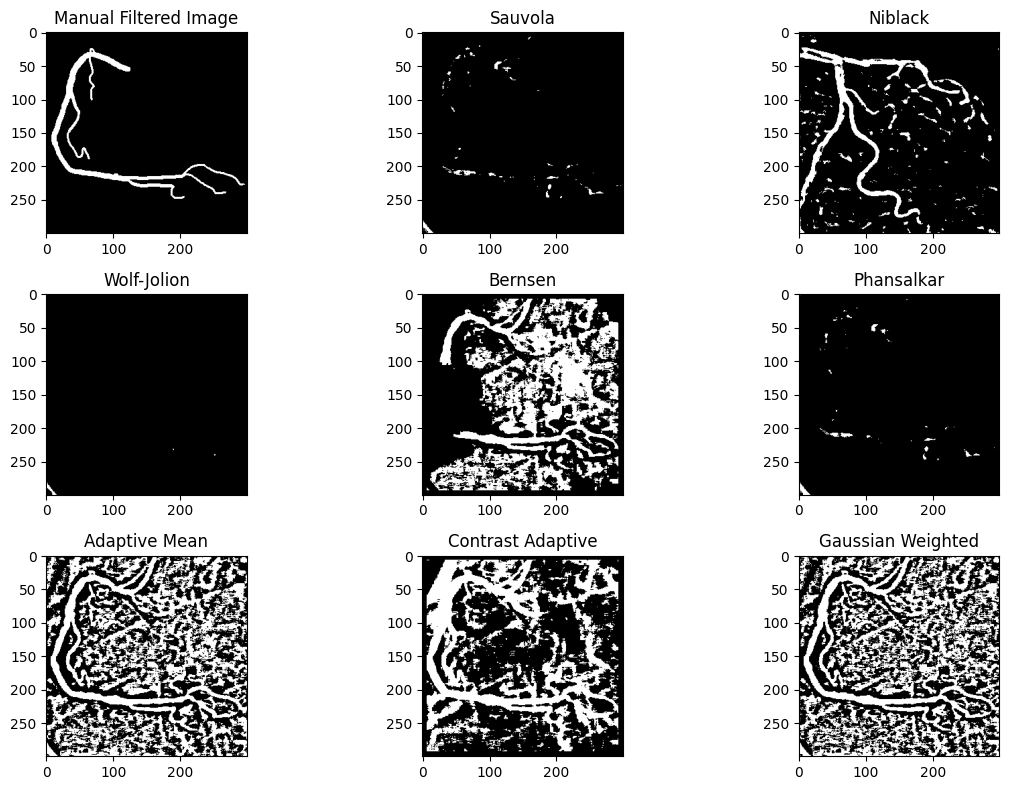

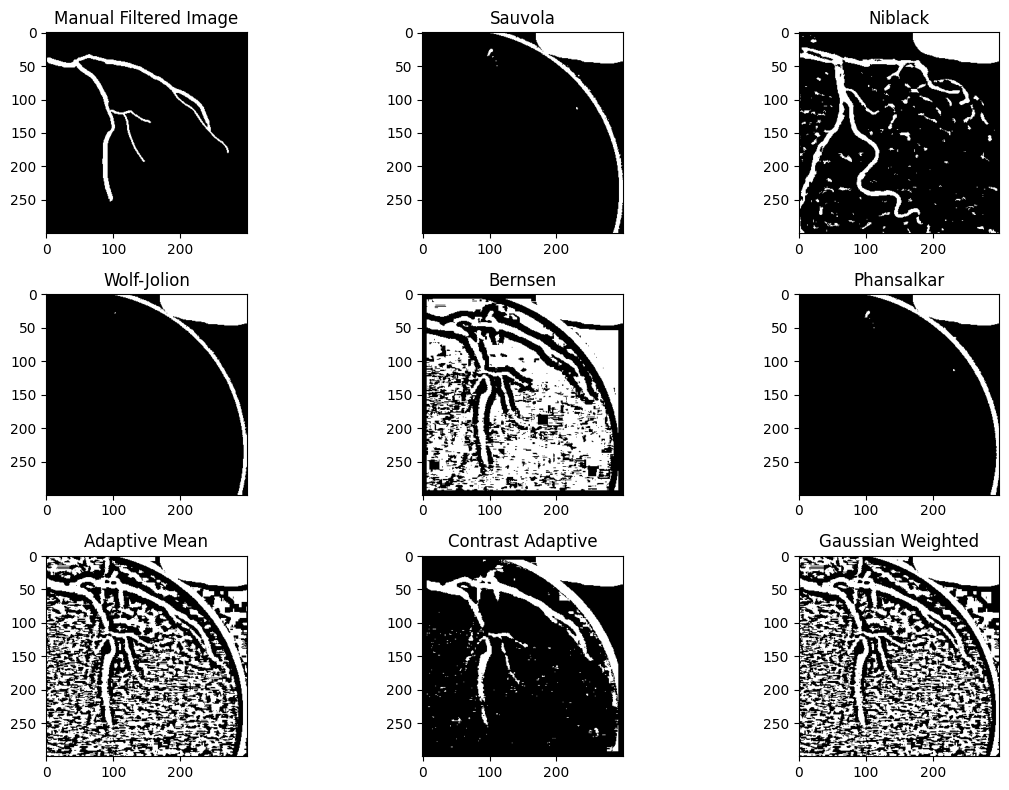

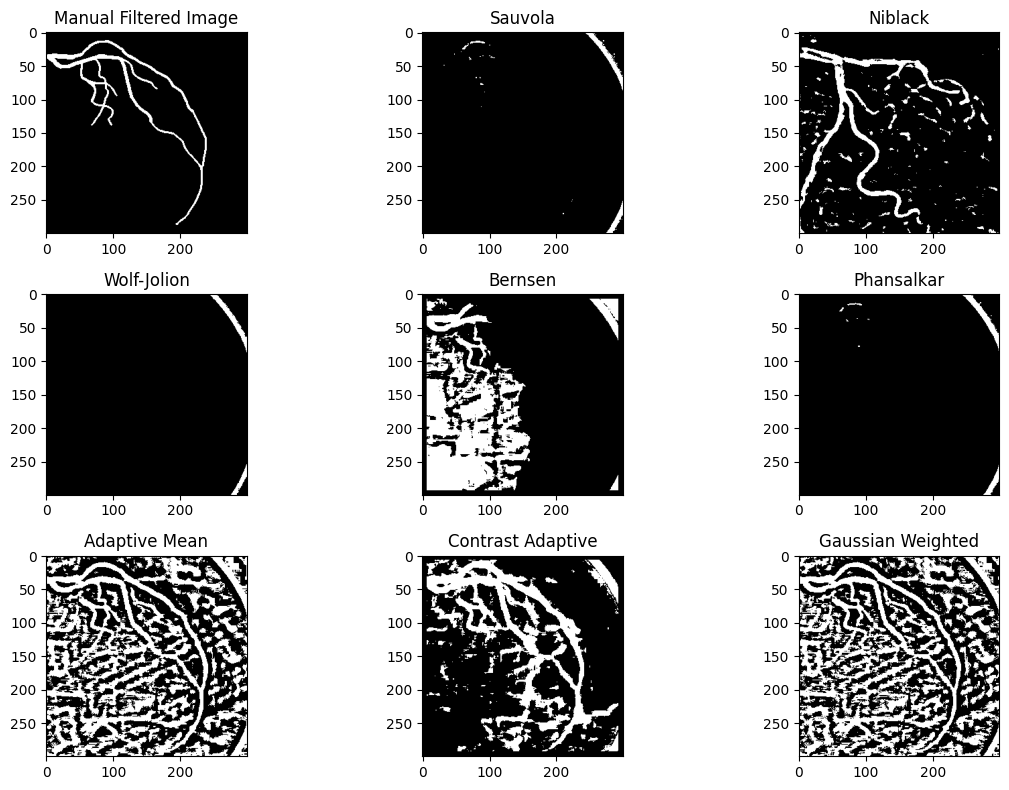

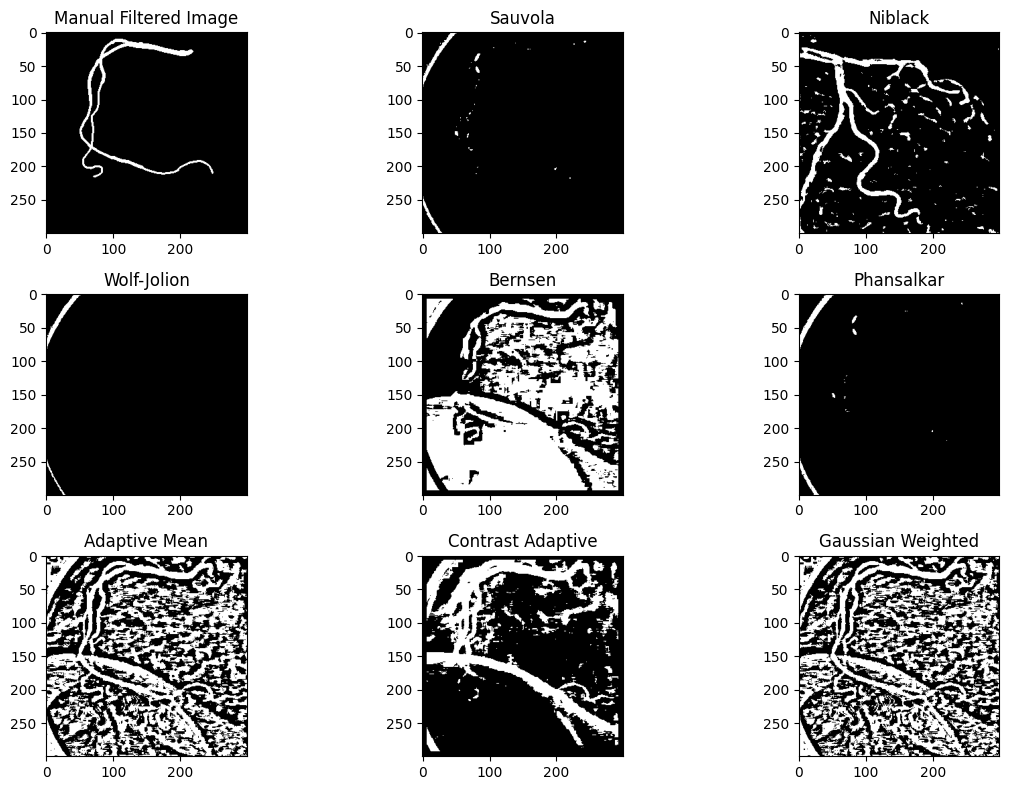

In [16]:
import os
import re
results = {}
for file in os.listdir(f'{os.curdir}/database'):
    if not re.search(r"(_gt|.ipynb)", file):
        I = plt.imread(f'{os.curdir}/database/{file}')
        # Display results
        results[file] = display_results(I, methods, file)
        

In [17]:
import pandas as pd
data = pd.DataFrame(data = results)
data

8.pgm  \
manual_filtered_image  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
ThSauvola              [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
ThNiblack              [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
ThWolfJolion           [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
ThBernsen              [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
ThPhansalkar           [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
ThAdaptiveMean         [[255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 255, 2...   
ThContrastAdaptive     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
ThGaussianWeighted     [[255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 255, 2...   

                                                                  17.pgm  \
manual_filtered_image  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
ThSauvola              [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
ThNiblack              [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
ThWolfJolion           [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
ThBernsen              [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
ThPhansalkar           [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
ThAdaptiveMean         [[255, 255, 255, 0, 0, 0, 0, 255, 0, 255, 255,...   
ThContrastAdaptive     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
ThGaussianWeighted     [[255, 255, 255, 0, 0, 0, 0, 255, 255, 255, 25...   

                                                                  20.pgm  \
manual_filtered_image  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
ThSauvola              [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
ThNiblack              [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
ThWolfJolion           [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
ThBernsen              [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
ThPhansalkar           [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
ThAdaptiveMean         [[0, 0, 255, 255, 255, 255, 255, 255, 255, 255...   
ThContrastAdaptive     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
ThGaussianWeighted     [[0, 0, 255, 255, 255, 255, 255, 255, 255, 255...   

                                                                  12.pgm  \
manual_filtered_image  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
ThSauvola              [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
ThNiblack              [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
ThWolfJolion           [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 25...   
ThBernsen              [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
ThPhansalkar           [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
ThAdaptiveMean         [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
ThContrastAdaptive     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
ThGaussianWeighted     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

                                                                  19.pgm  \
manual_filtered_image  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
ThSauvola              [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
ThNiblack              [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
ThWolfJolion           [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
ThBernsen              [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
ThPhansalkar           [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
ThAdaptiveMean         [[0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 25...   
ThContrastAdaptive     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
ThGaussianWeighted     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 25...   

                                                                   9.pgm  \
manual_filtered_image  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
ThSauvola              [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
ThNiblack              [[255, 255,

In [18]:
def pivot_table(dataframe):
    newDf = pd.DataFrame(index=dataframe.columns, columns=dataframe.index)
    for index in dataframe.index:
        newDf[index] = dataframe.loc[index]
    
    return newDf

In [19]:
pivoted_data = pivot_table(data)
pivoted_data

manual_filtered_image  \
8.pgm   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
17.pgm  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
20.pgm  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
12.pgm  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
19.pgm  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
9.pgm   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
18.pgm  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
6.pgm   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
3.pgm   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
11.pgm  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
13.pgm  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
4.pgm   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1.pgm   [[17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, ...   
7.pgm   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
15.pgm  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
14.pgm  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
16.pgm  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
10.pgm  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2.pgm   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
5.pgm   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

                                                ThSauvola  \
8.pgm   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
17.pgm  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
20.pgm  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
12.pgm  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
19.pgm  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
9.pgm   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
18.pgm  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
6.pgm   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
3.pgm   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
11.pgm  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
13.pgm  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
4.pgm   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
1.pgm   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
7.pgm   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
15.pgm  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
14.pgm  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
16.pgm  [[0, 0, 255, 255, 255, 255, 255, 255, 255, 255...   
10.pgm  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
2.pgm   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
5.pgm   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   

                                                ThNiblack  \
8.pgm   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
17.pgm  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
20.pgm  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
12.pgm  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
19.pgm  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
9.pgm   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
18.pgm  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
6.pgm   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
3.pgm   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
11.pgm  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
13.pgm  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
4.pgm   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
1.pgm   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
7.pgm   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
15.pgm  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
14.pgm  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
16.pgm  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
10.pgm  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
2.pgm   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
5.pgm   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   

                                             ThWolfJolion  \
8.pgm   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
17.pgm  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   
20.pgm 

In [20]:
def calculate_accuracy(im1, im2):
    correct_pixels = np.sum(im1 == im2)
    total_pixels = im1.size
    return correct_pixels / total_pixels

def calculate_recall(im1, im2):
    TP = np.sum((im1 == 255) & (im2 == 255))
    FN = np.sum((im1 == 0) & (im2 == 255))
    return TP / (TP + FN) if (TP + FN) != 0 else 0 
    
def calculate_specificity(im1, im2):
    TN = np.sum((im1 == 0) & (im2 == 0))
    FP = np.sum((im1 == 255) & (im2 == 0))
    return TN / (TN + FP) if (TN + FP) != 0 else 0 

def calculate_precision(im1, im2):
    TP = np.sum((im1 == 255) & (im2 == 255))
    FP = np.sum((im1 == 255) & (im2 == 0))
    return TP / (TP + FP) if (TP + FP) != 0 else 0 

def calculate_f1_score(im1, im2):
    precision = calculate_precision(im1, im2)
    recall = calculate_recall(im1, im2)
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
 

In [21]:
def calculate_metrics(dataframe):
    metrics = pd.DataFrame(columns = ['image', 'threshold', 'accuracy', 'recall', 'specificity', 'precision', 'f1'])
    metodos = ["manual","Sauvola","Niblack","Wolf-Jolion","Bernsen","Phansalkar","Adaptive Mean","Contrast Adaptive","Gaussian Weighted"]
    
    for index in dataframe.index:
        row = dataframe.loc[index]
        manual_filtered_image = row[0]  # Assuming the first column is the manually thresholded image
        
        # Loop through methods (columns from 1 to the last column)
        for i in range(1, len(row)):
            method = metodos[i]  # Get the method name
            
            # Calculate the metrics for the current method
            accuracy = calculate_accuracy(row[i], manual_filtered_image)
            recall = calculate_recall(row[i], manual_filtered_image)
            specificity = calculate_specificity(row[i], manual_filtered_image)
            precision = calculate_precision(row[i], manual_filtered_image)
            f1 = calculate_f1_score(row[i], manual_filtered_image)
            
            # Create a new row with calculated metrics
            new_row = pd.DataFrame([[index, method, accuracy, recall, specificity, precision, f1]], 
                                   columns=metrics.columns)
            
            # Append the new row to the metrics DataFrame
            metrics = pd.concat([metrics, new_row], ignore_index=True)
    
    return metrics

In [22]:
metrics = calculate_metrics(pivoted_data)
metrics

/tmp/ipykernel_9761/3837844067.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  manual_filtered_image = row[0]  # Assuming the first column is the manually thresholded image
/tmp/ipykernel_9761/3837844067.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  accuracy = calculate_accuracy(row[i], manual_filtered_image)
/tmp/ipykernel_9761/3837844067.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  recall = calculate_recall(row[

image          threshold  accuracy    recall  specificity  precision  \
0    8.pgm            Sauvola  0.054300  0.996666     0.008182   0.046873   
1    8.pgm            Niblack  0.128500  0.788283     0.096211   0.040937   
2    8.pgm        Wolf-Jolion  0.051556  1.000000     0.005140   0.046885   
3    8.pgm            Bernsen  0.369900  0.090260     0.383585   0.007115   
4    8.pgm         Phansalkar  0.054378  0.997142     0.008240   0.046897   
..     ...                ...       ...       ...          ...        ...   
155  5.pgm            Bernsen  0.532422  0.172965     0.545910   0.014092   
156  5.pgm         Phansalkar  0.046444  0.963748     0.012024   0.035311   
157  5.pgm      Adaptive Mean  0.463856  0.026728     0.480258   0.001926   
158  5.pgm  Contrast Adaptive  0.212067  0.177573     0.213361   0.008399   
159  5.pgm  Gaussian Weighted  0.464289  0.032873     0.480477   0.002369   

           f1  
0    0.089535  
1    0.077832  
2    0.089571  
3    0.013190  
4    0.089581  
..        ...  
155  0.026060  
156  0.068126  
157  0.003593  
158  0.016040  
159  0.004419  

[160 rows x 7 columns]

In [23]:
metrics[["threshold",'accuracy',	'recall',	'specificity',	'precision',	'f1']].groupby('threshold').mean()

accuracy    recall  specificity  precision        f1
threshold                                                              
Adaptive Mean      0.409206  0.044397     0.428115   0.004387  0.007954
Bernsen            0.295072  0.354449     0.290403   0.024830  0.046269
Contrast Adaptive  0.181644  0.082817     0.187018   0.004920  0.009268
Gaussian Weighted  0.411224  0.053033     0.429780   0.005256  0.009526
Niblack            0.128094  0.775796     0.094679   0.042500  0.080396
Phansalkar         0.057613  0.912236     0.012635   0.046231  0.087797
Sauvola            0.056034  0.902431     0.011493   0.045712  0.086812
Wolf-Jolion        0.057504  0.949821     0.010558   0.047929  0.091040